In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from trace_data.graph_list_from_trace import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['soykb-chameleon-10fastq-10ch-001.json',
'soykb-chameleon-10fastq-20ch-001.json',
'soykb-chameleon-20fastq-10ch-001.json',
'soykb-chameleon-20fastq-20ch-001.json',
'soykb-chameleon-30fastq-10ch-001.json',
'soykb-chameleon-30fastq-20ch-001.json',
'soykb-chameleon-40fastq-10ch-001.json',
'soykb-chameleon-40fastq-20ch-001.json',
'soykb-chameleon-50fastq-10ch-001.json',
'soykb-chameleon-50fastq-20ch-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/soykb/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

96
156
176
286
256
416
336
546
416
676


In [3]:
G_list[0]

In [6]:
mrt = True
tie_breaking_rule = 2
plot = False
num = 5
x = []
y = []
lbs= []
ubs = []
 
naives = []
heur = []
for num_tasks in [10,20,30]:
    counter = 0
    while counter != 100:
        
        seed=random.randint(0, 100000)
        edges = random.randint(2, num_tasks-1)
        num_machines = random.randint(2, num_tasks-1)
        G = random_dag(num_tasks, edges, seed=seed)
    
    
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]

        naive, true, order =iterative_and_naive_heuristic_no_ratio(num_machines, w, G, naive_version=2, iterations=1,verbose=False)
        _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
        d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
        
        # Record data only if solver was successful
        if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:

            x.append(num_tasks)
            heur.append(true)
            naives.append(naive)
            y.append(obj_opt)
            lbs.append(d["objective_task_scaling"])
            ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
            ubs.append(ub)
            counter += 1

        


[1.0, 1.0, 2.6457513110645907, 1.7320508075688772, 1.0, 1.0, 1.0, 2.0, 2.23606797749979, 2.449489742783178]
apm 67.22.20.162_gk_model61 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           17
   Constants    :            0
   Variables    :          195
   Intermediates:            0
   Connections  :          137
   Equations    :          118
   Residuals    :          118
 
 Number of state variables:            195
 Number of total equations: -          134
 Number of slack variables: -           45
 ---------------------------------------
 Degrees of freedom       :             16
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Ex

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
4 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
5 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
8 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
9 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
Obj

Results
0 Speed: [0.9999989233] Ending Time: [1.0000010667] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.7320488288] Ending Time: [0.57735091879] Interval: [0.0, 0.57735] Task process time: 0.57735
2 Speed: [1.9999975537] Ending Time: [1.0773515204] Interval: [0.57735, 1.07735] Task process time: 0.5
3 Speed: [1.7320485856] Ending Time: [1.6547025202] Interval: [1.07735, 1.6547] Task process time: 0.57735
4 Speed: [1.4142116361] Ending Time: [2.3618102545] Interval: [1.6547, 2.36181] Task process time: 0.70711
5 Speed: [0.9999989233] Ending Time: [1.0000010667] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999831731] Ending Time: [3.3618119271] Interval: [2.36181, 3.36181] Task process time: 1.0
7 Speed: [1.7320488288] Ending Time: [0.57735091879] Interval: [0.0, 0.57735] Task process time: 0.57735
8 Speed: [0.999998936] Ending Time: [1.000001054] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.999998936] Ending Time: [1.000001054] Interval: [0.0, 1.0] Ta

Results
0 Speed: [0.9999999997] Ending Time: [0.99999999126] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.414213554] Ending Time: [1.3395622992] Interval: [0.63246, 1.33956] Task process time: 0.70711
2 Speed: [1.5811388382] Ending Time: [0.63245551915] Interval: [0.0, 0.63246] Task process time: 0.63246
3 Speed: [0.99999995963] Ending Time: [1.8660253988] Interval: [0.86603, 1.86603] Task process time: 1.0
4 Speed: [1.5811388192] Ending Time: [0.6324555262] Interval: [0.0, 0.63246] Task process time: 0.63246
5 Speed: [1.1547005376] Ending Time: [0.86602539503] Interval: [0.0, 0.86603] Task process time: 0.86603
6 Speed: [1.1547005376] Ending Time: [0.86602539503] Interval: [0.0, 0.86603] Task process time: 0.86603
7 Speed: [0.99999999983] Ending Time: [1.6324555101] Interval: [0.63246, 1.63246] Task process time: 1.0
8 Speed: [1.1547005376] Ending Time: [0.86602539503] Interval: [0.0, 0.86603] Task process time: 0.86603
9 Speed: [0.9999999552] Ending Time: [2.3395623051] In

Results
0 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [1.816496561] Interval: [0.8165, 1.8165] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
Objective: 21.72740649
[1.0, 2.6457513110645907, 1.7320

Results
0 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
1 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
2 Speed: [1.7320508076] Ending Time: [1.2098057812] Interval: [0.63246, 1.20981] Task process time: 0.57735
3 Speed: [1.4142135624] Ending Time: [1.9169125524] Interval: [1.20981, 1.91691] Task process time: 0.70711
4 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [0.9999999941] Ending Time: [2.9169125444] Interval: [1.91691, 2.91691] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
7 Speed: [1.5811388301] Ending Time: [0.63245552204] Interval: [0.0, 0.63246] Task process time: 0.63246
8 Speed: [1.5811388301] Ending Time: [0.63245552204] Interval: [0.0, 0.63246] Task process time: 0.63246
9 Speed: [1.0] Ending Time: [2.2844570204] Interval

Results
0 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
8 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
Object

Results
0 Speed: [0.99999999854] Ending Time: [0.99999999098] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999938] Ending Time: [1.7071067621] Interval: [0.70711, 1.70711] Task process time: 1.0
2 Speed: [1.4142135585] Ending Time: [1.8618072907] Interval: [1.1547, 1.86181] Task process time: 0.70711
3 Speed: [0.99999981482] Ending Time: [2.8618073472] Interval: [1.86181, 2.86181] Task process time: 1.0
4 Speed: [1.7320508071] Ending Time: [1.1547005188] Interval: [0.57735, 1.1547] Task process time: 0.57735
5 Speed: [1.7320508074] Ending Time: [0.57735025927] Interval: [0.0, 0.57735] Task process time: 0.57735
6 Speed: [0.99999999854] Ending Time: [0.99999999098] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.7320508069] Ending Time: [0.57735025942] Interval: [0.0, 0.57735] Task process time: 0.57735
8 Speed: [1.4142135621] Ending Time: [0.70710677142] Interval: [0.0, 0.70711] Task process time: 0.70711
9 Speed: [0.9999999993] Ending Time: [1.57735025] Interva

Results
0 Speed: [1.0] Ending Time: [2.5245638247] Interval: [1.52456, 2.52456] Task process time: 1.0
1 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
2 Speed: [0.99999999926] Ending Time: [2.524563825] Interval: [1.52456, 2.52456] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.7320508075] Ending Time: [1.5245638347] Interval: [0.94721, 1.52456] Task process time: 0.57735
8 Speed: [2.0] Ending Time: [0.94721357552] Interval: [0.44721, 0.94721] Task process time: 0.5
9 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
Objective: 26.764664494

Results
0 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
7 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
Object

Results
0 Speed: [1.4142135623] Ending Time: [0.70710677121] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [1.7320508076] Ending Time: [0.57735025919] Interval: [0.0, 0.57735] Task process time: 0.57735
2 Speed: [0.99999999995] Ending Time: [1.7071067613] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [1.2247448714] Ending Time: [0.81649657093] Interval: [0.0, 0.8165] Task process time: 0.8165
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [1.8164965609] Interval: [0.8165, 1.8165] Task process time: 1.0
6 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
9 Speed: [1.2247448714] Ending Time: [0.81649657093] Interval: [0.0, 0.8165] Task process time: 0.8165

apm 67.22.20.162_gk_model103 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           15
   Constants    :            0
   Variables    :          139
   Intermediates:            0
   Connections  :           95
   Equations    :           84
   Residuals    :           84
 
 Number of state variables:            139
 Number of total equations: -           98
 Number of slack variables: -           31
 ---------------------------------------
 Degrees of freedom       :             10
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [1.8164965609] Interval: [0.8165, 1.8165] Task process time: 1.0
1 Speed: [0.99999984882] Ending Time: [2.7844570609] Interval: [1.78446, 2.78446] Task process time: 1.0
2 Speed: [1.4142135624] Ending Time: [1.7844570204] Interval: [1.07735, 1.78446] Task process time: 0.70711
3 Speed: [1.7320508075] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
4 Speed: [1.2247448714] Ending Time: [0.81649657093] Interval: [0.0, 0.8165] Task process time: 0.8165
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0000000001] Ending Time: [0.99999998994] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.9999999999] Ending Time: [0.49999999002] Interval: [0.0, 0.5] Task process time: 0.5
9 Speed: [1.2247448714] Ending Time: [0.81649657093] Interval: [0.0, 0.8165] Task process time: 0.8165
Object

   3  3.1610244e+01 6.46e-02 1.42e+00  -1.2 8.67e+00    -  6.06e-01 1.00e+00f  1
   4  1.5674753e+01 3.70e+01 2.79e+03  -0.9 3.43e+01    -  6.05e-01 5.76e-01f  1
   5  1.9843857e+01 2.99e+01 2.31e+03  -1.1 1.90e+01    -  1.76e-01 2.07e-01h  1
   6  3.0801510e+01 1.23e+01 1.18e+03  -1.1 1.07e+01    -  2.00e-01 9.30e-01h  1
   7  3.4427768e+01 1.34e+00 4.20e+02  -1.0 9.23e+00    -  8.19e-01 1.00e+00h  1
   8  2.8743357e+01 2.52e+00 1.87e+02  -1.1 2.16e+01    -  5.44e-01 1.00e+00f  1
   9  2.5953520e+01 1.62e+00 8.25e+01  -1.7 1.32e+01    -  7.72e-01 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.4472217e+01 1.05e+00 3.68e+01  -3.1 3.65e+00    -  9.74e-01 9.76e-01h  1
  11  2.3548574e+01 6.74e-01 1.59e+01  -4.3 5.27e+00    -  9.33e-01 1.00e+00h  1
  12  2.3043609e+01 4.08e-01 6.57e+00  -5.4 6.96e+00    -  9.71e-01 1.00e+00h  1
  13  2.2843729e+01 2.20e-01 2.48e+00  -6.6 1.36e+01    -  8.49e-01 1.00e+00h  1
  14  2.2834511e+01 8.97e-02

Results
0 Speed: [2.5110784871] Ending Time: [0.76821211456] Interval: [0.36998, 0.76821] Task process time: 0.39824
1 Speed: [1.3017237922] Ending Time: [0.76821211455] Interval: [0.0, 0.76821] Task process time: 0.76821
2 Speed: [0.99999999994] Ending Time: [0.99999999003] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999983] Ending Time: [3.4609174156] Interval: [2.46092, 3.46092] Task process time: 1.0
4 Speed: [1.4142135623] Ending Time: [1.8835671662] Interval: [1.17646, 1.88357] Task process time: 0.70711
5 Speed: [1.7320508075] Ending Time: [1.7538106543] Interval: [1.17646, 1.75381] Task process time: 0.57735
6 Speed: [2.7028716523] Ending Time: [0.36997686225] Interval: [0.0, 0.36998] Task process time: 0.36998
7 Speed: [2.4494897427] Ending Time: [1.176460395] Interval: [0.76821, 1.17646] Task process time: 0.40825
8 Speed: [1.4142135621] Ending Time: [2.4609174255] Interval: [1.75381, 2.46092] Task process time: 0.70711
9 Speed: [1.0] Ending Time: [2.88356715


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:      412
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       60

Total number of variables............................:      179
                     variables with only lower bounds:       52
                variables with lower and upper bounds:       50
                     variables with only upper bounds:        0
Total number of equality constraints.................:      118
Total number of inequality constra

Results
0 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999993] Ending Time: [2.0773502393] Interval: [1.07735, 2.07735] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
4 Speed: [1.7320508075] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
5 Speed: [0.99999999999] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [2.0] Ending Time: [0.49999999001] Interval: [0.0, 0.5] Task process time: 0.5
9 Speed: [1.0] Ending Time: [2.0773502392] Interval: [1.07735, 2.07735] Task process time: 1.0
Objective: 24.29252858
[1.0, 1.7320508075688772, 1

   4  2.4941097e+01 1.88e+01 1.96e+03  -1.3 2.99e+01    -  8.17e-02 2.70e-01h  1
   5  3.8230729e+01 7.71e+00 1.06e+03  -1.3 2.24e+01    -  1.36e-01 6.58e-01h  1
   6  4.3625198e+01 1.28e+00 3.80e+02  -1.3 4.40e+00    -  8.18e-01 1.00e+00h  1
   7  3.2041235e+01 2.44e+00 1.70e+02  -1.3 1.13e+01    -  3.67e-01 1.00e+00f  1
   8  2.7548785e+01 1.50e+00 7.46e+01  -1.8 4.70e+00    -  7.84e-01 1.00e+00f  1
   9  2.4480426e+01 1.00e+00 3.27e+01  -3.2 3.24e+00    -  9.43e-01 9.99e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.2769887e+01 6.31e-01 1.41e+01  -4.3 1.94e+00    -  9.81e-01 1.00e+00h  1
  11  2.1857886e+01 3.78e-01 5.77e+00  -5.3 4.58e+00    -  8.73e-01 1.00e+00h  1
  12  2.1526637e+01 1.98e-01 2.13e+00  -6.8 1.37e+00    -  9.62e-01 1.00e+00h  1
  13  2.1540342e+01 7.60e-02 6.11e-01  -7.9 2.33e+00    -  9.76e-01 1.00e+00h  1
  14  2.1629056e+01 1.45e-02 9.67e-02 -11.0 2.05e-01    -  8.87e-01 9.91e-01h  1
  15  2.1655792e+01 5.32e-04

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [1.7071067613] Interval: [0.70711, 1.70711] Task process time: 1.0
4 Speed: [1.4142135618] Ending Time: [0.70710677129] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.4142135618] Ending Time: [0.70710677129] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [1.7071067613] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
Objective: 21.656854129
[1.0, 1.0, 1.0, 1.0, 1.4142135623730951,

apm 67.22.20.162_gk_model127 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           21
   Constants    :            0
   Variables    :          275
   Intermediates:            0
   Connections  :          221
   Equations    :          154
   Residuals    :          154
 
 Number of state variables:            275
 Number of total equations: -          174
 Number of slack variables: -           41
 ---------------------------------------
 Degrees of freedom       :             60
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

   4  1.6996958e+01 3.12e+01 2.44e+03  -1.2 2.52e+01    -  7.68e-01 8.90e-01f  1
   5  2.3284742e+01 2.43e+01 1.95e+03  -1.3 2.49e+01    -  1.36e-01 2.41e-01h  1
   6  4.2687734e+01 6.09e+00 9.11e+02  -1.3 1.85e+01    -  2.83e-01 1.00e+00h  1
   7  3.6906118e+01 1.86e+00 3.32e+02  -1.3 6.83e+00    -  7.35e-01 1.00e+00f  1
   8  3.0877314e+01 2.48e+00 1.51e+02  -1.3 1.50e+01    -  5.30e-01 1.00e+00f  1
   9  2.7649417e+01 1.41e+00 6.60e+01  -1.9 6.16e+00    -  7.72e-01 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.5951322e+01 9.34e-01 2.89e+01  -2.7 4.90e+00    -  9.79e-01 1.00e+00h  1
  11  2.5138825e+01 5.86e-01 1.23e+01  -3.8 1.32e+01    -  7.06e-01 1.00e+00h  1
  12  2.4791217e+01 3.47e-01 5.01e+00  -4.3 1.31e+01    -  9.64e-01 1.00e+00h  1
  13  2.4689472e+01 1.76e-01 1.80e+00  -5.6 1.91e+01    -  7.61e-01 1.00e+00h  1
  14  2.4713804e+01 6.26e-02 4.85e-01  -6.8 4.96e+00    -  9.84e-01 1.00e+00h  1
  15  2.4755229e+01 9.67e-03

Results
0 Speed: [1.466665836] Ending Time: [1.598708971] Interval: [0.91689, 1.59871] Task process time: 0.68182
1 Speed: [1.7751362411] Ending Time: [0.91689041304] Interval: [0.35355, 0.91689] Task process time: 0.56334
2 Speed: [1.0] Ending Time: [1.8632739488] Interval: [0.86327, 1.86327] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [3.3058157322] Interval: [2.30582, 3.30582] Task process time: 1.0
6 Speed: [1.9618591502] Ending Time: [0.86327395879] Interval: [0.35355, 0.86327] Task process time: 0.50972
7 Speed: [1.3597394329] Ending Time: [1.598708971] Interval: [0.86327, 1.59871] Task process time: 0.73544
8 Speed: [1.4142135624] Ending Time: [2.3058157422] Interval: [1.59871, 2.30582] Task process time: 0.70711
9 Speed: [2.8284271247] Ending Time: [0.3535533806] Interval: [0.0, 0.35355] Task proce

Results
0 Speed: [1.0000000003] Ending Time: [0.99999998971] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.7320508074] Ending Time: [1.0773502493] Interval: [0.5, 1.07735] Task process time: 0.57735
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
4 Speed: [1.9999999998] Ending Time: [0.49999999004] Interval: [0.0, 0.5] Task process time: 0.5
5 Speed: [1.0] Ending Time: [2.0773502393] Interval: [1.07735, 2.07735] Task process time: 1.0
6 Speed: [1.0] Ending Time: [2.0773502393] Interval: [1.07735, 2.07735] Task process time: 1.0
7 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
Objective: 25.7566301

Results
0 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
2 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [0.99999999992] Ending Time: [0.99999999004] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
9 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
Object

Results
0 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
1 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
2 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
3 Speed: [1.0] Ending Time: [2.7844570104] Interval: [1.78446, 2.78446] Task process time: 1.0
4 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
5 Speed: [1.7320508075] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
6 Speed: [1.4142135623] Ending Time: [1.7844570204] Interval: [1.07735, 1.78446] Task process time: 0.70711
7 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
8 Speed: [2.0] Ending Time: [0.49999999001] Interval: [0.0, 0.5] Task process time: 0.5
9 Speed: [1.7320508076] Ending Time: [0.57735025919] Interval: [0.0, 0.57735] Task process time: 0.5

   3  3.6243843e+01 7.21e-02 6.03e+00  -1.7 1.01e+01    -  6.59e-01 6.61e-01f  1
   4  2.8837919e+01 8.90e-02 1.96e+00  -1.7 1.28e+01    -  7.98e-01 6.79e-01f  1
   5  2.3539800e+01 2.06e-01 4.46e-01  -2.2 8.47e+00    -  7.64e-01 1.00e+00f  1
   6  2.5065316e+01 1.47e-02 9.93e-02  -2.8 2.41e+00    -  8.82e-01 1.00e+00h  1
   7  2.5118618e+01 6.56e-04 4.28e-03  -8.5 7.70e-02    -  9.73e-01 9.74e-01h  1
   8  2.5120928e+01 8.24e-06 3.64e-05 -10.1 3.71e-03    -  9.93e-01 9.93e-01h  1
   9  2.5120956e+01 2.26e-08 4.00e-08 -11.0 2.02e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   2.5120955664516455e+01    2.5120955664516455e+01
Dual infeasibility......:   4.0001865656270040e-08    4.0001865656270040e-08
Constraint violation....:   2.2626977933041021e-08    2.2626977933041021e-08
Complementarity.........:   6.2154577523592189e-08    6.2154577523592189e-08
Overall NLP error.......

Results
0 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
Objective: 23.120955725
[1.0, 1.0, 1.732050807

   0  1.0000000e+01 5.00e+00 1.39e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  4.5478508e+01 4.15e-01 4.26e+01  -0.1 3.72e+01    -  2.27e-02 1.00e+00f  1
   2  3.8186722e+01 8.48e-02 7.71e+00  -6.1 6.22e+00    -  8.66e-01 8.19e-01f  1
   3  2.3062801e+01 4.82e-01 9.88e-01  -0.9 1.72e+01    -  5.53e-01 1.00e+00f  1
   4  2.0659977e+01 2.80e-01 1.13e+00  -1.7 5.78e+00    -  7.38e-01 7.58e-01f  1
   5  2.1960253e+01 6.09e-02 2.91e-01  -2.4 1.17e+00    -  9.28e-01 8.25e-01h  1
   6  2.2261295e+01 5.73e-03 3.35e-02  -3.9 2.62e-01    -  9.72e-01 9.60e-01h  1
   7  2.2291115e+01 2.50e-04 1.47e-03  -9.5 3.97e-02    -  9.82e-01 9.67e-01h  1
   8  2.2292524e+01 8.41e-07 4.97e-06 -11.0 1.82e-03    -  9.98e-01 9.97e-01h  1
   9  2.2292529e+01 3.13e-12 1.40e-08 -11.0 9.01e-03    -  9.98e-01 1.00e+00h  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   2.2292528609965558e+01    2.2292528609965558e+01
Dual infeasi

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999988199] Ending Time: [3.5234465542] Interval: [2.52345, 3.52345] Task process time: 1.0
3 Speed: [1.4142135624] Ending Time: [2.5234465249] Interval: [1.81634, 2.52345] Task process time: 0.70711
4 Speed: [1.6804232932] Ending Time: [1.2389894945] Interval: [0.6439, 1.23899] Task process time: 0.59509
5 Speed: [1.7320508075] Ending Time: [1.8163397537] Interval: [1.23899, 1.81634] Task process time: 0.57735
6 Speed: [1.7821833675] Ending Time: [0.56110947976] Interval: [0.0, 0.56111] Task process time: 0.56111
7 Speed: [1.475187295] Ending Time: [1.2389894945] Interval: [0.56111, 1.23899] Task process time: 0.67788
8 Speed: [1.5530329109] Ending Time: [0.64390134779] Interval: [0.0, 0.6439] Task process time: 0.6439
9 Speed: [1.5530329109] Ending Time: [0.64390134779] Interval: [0.0, 0.64

  11  2.6162742e+01 3.78e-01 5.77e+00  -4.4 2.47e+00    -  9.47e-01 1.00e+00h  1
  12  2.6043617e+01 1.98e-01 2.13e+00  -5.7 2.12e+00    -  9.04e-01 1.00e+00h  1
  13  2.6069524e+01 7.61e-02 6.12e-01  -6.7 2.24e+00    -  9.67e-01 1.00e+00h  1
  14  2.6115469e+01 1.40e-02 9.28e-02  -8.3 1.36e+00    -  9.41e-01 1.00e+00h  1
  15  2.6128498e+01 4.92e-04 3.00e-03  -9.5 1.70e+00    -  9.78e-01 1.00e+00h  1
  16  2.6128989e+01 5.61e-07 3.37e-06 -11.0 2.16e+00    -  9.38e-01 1.00e+00h  1
Reallocating memory for MA57: lfact (3144)
  17  2.6128990e+01 7.09e-13 3.52e-10 -11.0 3.67e+01    -  7.29e-01 1.00e+00h  1

Number of Iterations....: 17

                                   (scaled)                 (unscaled)
Objective...............:   2.6128990014591249e+01    2.6128990014591249e+01
Dual infeasibility......:   3.5226266348331592e-10    3.5226266348331592e-10
Constraint violation....:   7.0892682162020472e-13    7.0892682162020472e-13
Complementarity.........:   4.6816555420182830e-10    4.6

apm 67.22.20.162_gk_model163 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           17
   Constants    :            0
   Variables    :          205
   Intermediates:            0
   Connections  :          137
   Equations    :          128
   Residuals    :          128
 
 Number of state variables:            205
 Number of total equations: -          144
 Number of slack variables: -           55
 ---------------------------------------
 Degrees of freedom       :              6
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [1.9472135655] Interval: [0.94721, 1.94721] Task process time: 1.0
1 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
2 Speed: [0.99999999198] Ending Time: [2.6543203394] Interval: [1.65432, 2.65432] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [1.6543203467] Interval: [0.94721, 1.65432] Task process time: 0.70711
7 Speed: [2.0] Ending Time: [0.94721357551] Interval: [0.44721, 0.94721] Task process time: 0.5
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
Objective: 25.300562894
[1.0, 1.73205080756

   1  4.6883802e+01 5.20e-01 4.94e+01  -0.1 3.88e+01    -  1.96e-02 1.00e+00f  1
   2  3.9003238e+01 9.43e-02 7.87e+00  -6.1 6.75e+00    -  8.38e-01 8.41e-01f  1
   3  2.1371090e+01 8.00e-01 1.26e+00  -1.0 1.97e+01    -  6.41e-01 1.00e+00f  1
   4  2.2259365e+01 2.70e-01 1.63e+00  -1.4 3.81e+00    -  7.42e-01 9.88e-01h  1
   5  2.3061594e+01 3.16e-02 3.28e-01  -2.2 6.08e-01    -  9.14e-01 1.00e+00h  1
   6  2.3096249e+01 6.81e-03 4.87e-02  -4.2 3.09e-01    -  9.68e-01 9.39e-01h  1
   7  2.3120272e+01 1.73e-04 1.03e-03  -5.5 8.09e-02    -  9.83e-01 9.97e-01h  1
   8  2.3120955e+01 2.99e-07 1.78e-06 -11.0 1.07e-03    -  9.99e-01 9.99e-01h  1
   9  2.3120956e+01 2.02e-13 1.61e-10 -11.0 1.18e-02    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   2.3120955724729264e+01    2.3120955724729264e+01
Dual infeasibility......:   1.6112378098398494e-10    1.6112378098398494e-10
Constraint viola

apm 67.22.20.162_gk_model173 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           15
   Constants    :            0
   Variables    :          137
   Intermediates:            0
   Connections  :           95
   Equations    :           82
   Residuals    :           82
 
 Number of state variables:            137
 Number of total equations: -           96
 Number of slack variables: -           29
 ---------------------------------------
 Degrees of freedom       :             12
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
Objective: 22.485281244
[1.0, 1.41421356237

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
3 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
4 Speed: [1.0] Ending Time: [2.5245638247] Interval: [1.52456, 2.52456] Task process time: 1.0
5 Speed: [1.7320508075] Ending Time: [1.5245638347] Interval: [0.94721, 1.52456] Task process time: 0.57735
6 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
7 Speed: [2.0] Ending Time: [0.94721357551] Interval: [0.44721, 0.94721] Task process time: 0.5
8 Speed: [0.99999999992] Ending Time: [1.816496561] Interval: [0.8165, 1.8165] Task process time: 1.0
9 Speed: [1.0] Ending Time: [2.5245638247] Interval: [1.52456, 2.52456] Task process time: 1.0
Objective

Results
0 Speed: [1.4142135624] Ending Time: [1.1153550517] Interval: [0.40825, 1.11536] Task process time: 0.70711
1 Speed: [1.7320508076] Ending Time: [0.98559853967] Interval: [0.40825, 0.9856] Task process time: 0.57735
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [1.0] Ending Time: [2.6927053009] Interval: [1.69271, 2.69271] Task process time: 1.0
4 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
5 Speed: [1.0] Ending Time: [2.1153550417] Interval: [1.11536, 2.11536] Task process time: 1.0
6 Speed: [0.99999978828] Ending Time: [1.0000000606] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.4142135624] Ending Time: [1.6927053109] Interval: [0.9856, 1.69271] Task process time: 0.70711
8 Speed: [2.4494897428] Ending Time: [0.40824828047] Interval: [0.0, 0.40825] Task process time: 0.40825
9 Speed: [0.99999978828] Ending Time: [1.0000000606] Interval: [0.0, 1.0] Task

   4  2.3841423e+01 7.24e-01 4.22e+00  -1.2 1.30e+01    -  6.51e-01 7.67e-01f  1
   5  2.6121017e+01 4.73e-02 1.03e+00  -1.5 3.03e+00    -  8.18e-01 1.00e+00h  1
   6  2.5923558e+01 2.80e-02 2.74e-01  -2.9 6.25e-01    -  8.78e-01 8.73e-01h  1
   7  2.5942194e+01 3.97e-03 2.62e-02  -4.3 1.44e-01    -  9.62e-01 9.85e-01h  1
   8  2.5949328e+01 4.27e-05 2.54e-04  -5.7 4.62e-02    -  9.84e-01 1.00e+00h  1
   9  2.5949383e+01 1.70e-08 1.01e-07 -11.0 1.24e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   2.5949382786210997e+01    2.5949382786210997e+01
Dual infeasibility......:   1.0073434387100261e-07    1.0073434387100261e-07
Constraint violation....:   1.7044917006114090e-08    1.7044917006114090e-08
Complementarity.........:   6.2453640004964482e-09    6.2453640004964482e-09
Overall NLP error.......:   1.0073434387100261e-07    1.0073434387100261e-07


Number of objective functi

apm 67.22.20.162_gk_model191 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           18
   Constants    :            0
   Variables    :          202
   Intermediates:            0
   Connections  :          158
   Equations    :          114
   Residuals    :          114
 
 Number of state variables:            202
 Number of total equations: -          131
 Number of slack variables: -           31
 ---------------------------------------
 Degrees of freedom       :             40
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [0.99999999726] Ending Time: [2.4142135333] Interval: [1.41421, 2.41421] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [1.4142135424] Interval: [0.70711, 1.41421] Task process time: 0.70711
2 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
Objective: 23.3137

  19  2.7044758e+01 7.39e-02 7.66e+00  -4.1 6.69e+00    -  8.99e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.3400522e+01 4.37e+01 3.98e+03  -4.7 2.01e+01    -  8.84e-01 4.93e-01f  1
  21  4.2918819e+01 7.43e+00 1.77e+03  -4.1 5.52e+02    -  1.12e-01 1.00e+00h  1
  22  3.5834241e+01 4.95e+00 7.85e+02  -4.1 6.39e+02    -  7.80e-01 1.00e+00f  1
  23  3.1111663e+01 3.29e+00 3.49e+02  -4.1 2.77e+03    -  3.78e-01 1.00e+00f  1
  24  2.7891408e+01 2.19e+00 1.54e+02  -4.1 4.29e+03    -  7.97e-01 1.00e+00h  1
  25  2.5768498e+01 1.44e+00 6.81e+01  -4.1 1.74e+04    -  4.01e-01 1.00e+00h  1
  26  2.4416920e+01 9.40e-01 2.98e+01  -4.4 1.11e+04    -  9.76e-01 1.00e+00h  1
  27  2.3607345e+01 5.96e-01 1.27e+01  -6.1 1.18e+03    -  9.72e-01 1.00e+00h  1
  28  2.3189730e+01 3.54e-01 5.18e+00  -6.9 4.76e+03    -  1.00e+00 1.00e+00h  1
  29  2.3050375e+01 1.81e-01 1.88e+00  -8.3 2.19e+03    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr 

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
2 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
3 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
4 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
7 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
8 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
Objective: 24.58

   7  2.5387817e+01 1.42e-01 1.31e+00  -2.9 1.21e+00    -  7.76e-01 1.00e+00h  1
   8  2.5504607e+01 4.24e-02 3.08e-01  -3.8 5.68e-01    -  9.22e-01 1.00e+00h  1
   9  2.5583611e+01 4.51e-03 2.83e-02  -5.5 1.49e-01    -  9.74e-01 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.5592994e+01 4.89e-05 2.94e-04  -7.0 1.51e-01    -  9.83e-01 1.00e+00h  1
  11  2.5593092e+01 1.48e-08 8.87e-08 -11.0 9.78e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 11

                                   (scaled)                 (unscaled)
Objective...............:   2.5593091610250188e+01    2.5593091610250188e+01
Dual infeasibility......:   8.8669160363275288e-08    8.8669160363275288e-08
Constraint violation....:   1.4752087251784815e-08    1.4752087251784815e-08
Complementarity.........:   3.1308173759009817e-10    3.1308173759009817e-10
Overall NLP error.......:   8.8669160363275288e-08    8.8669160363275288e-08


Number of objective funct

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
4 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
5 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
6 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
9 Speed: [1.0] Ending Time: [1.816496561] Interval: [0.8165, 1.8165] Task process time: 1.0
Objective: 22.363080971
[2.23606797749979, 1.0, 

apm 67.22.20.162_gk_model209 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           21
   Constants    :            0
   Variables    :          272
   Intermediates:            0
   Connections  :          221
   Equations    :          151
   Residuals    :          151
 
 Number of state variables:            272
 Number of total equations: -          171
 Number of slack variables: -           38
 ---------------------------------------
 Degrees of freedom       :             63
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
2 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
8 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
9 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
Objective: 23.949382839

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           20
   Constants    :            0
   Variables    :          244
   Intermediates:            0
   Connections  :          200
   Equations    :          134
   Residuals    :          134
 
 Number of state variables:            244
 Number of total equations: -          153
 Number of slack variables: -           31
 ---------------------------------------
 Degrees of freedom       :             60
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

Results
0 Speed: [0.99999999423] Ending Time: [2.6066818143] Interval: [1.60668, 2.60668] Task process time: 1.0
1 Speed: [1.0000000052] Ending Time: [0.99999998386] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999859] Ending Time: [2.5757823499] Interval: [1.57578, 2.57578] Task process time: 1.0
3 Speed: [2.1990976829] Ending Time: [0.8686755845] Interval: [0.41394, 0.86868] Task process time: 0.45473
4 Speed: [1.0788741078] Ending Time: [1.6066816877] Interval: [0.67979, 1.60668] Task process time: 0.92689
5 Speed: [2.4157877828] Ending Time: [0.41394363448] Interval: [0.0, 0.41394] Task process time: 0.41394
6 Speed: [1.0000000015] Ending Time: [0.99999998922] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.3550020822] Ending Time: [1.6066818192] Interval: [0.86868, 1.60668] Task process time: 0.73801
8 Speed: [1.4142135601] Ending Time: [1.5757823573] Interval: [0.86868, 1.57578] Task process time: 0.70711
9 Speed: [1.4710436218] Ending Time: [0.67978948671

Results
0 Speed: [1.4137657591] Ending Time: [0.70733069047] Interval: [0.0, 0.70733] Task process time: 0.70733
1 Speed: [0.99999999998] Ending Time: [0.99999999003] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [0.99999999999] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
4 Speed: [0.99999999998] Ending Time: [0.99999999003] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999999999] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [1.0000000194] Ending Time: [1.7068828756] Interval: [0.70688, 1.70688] Task process time: 1.0
7 Speed: [1.4146613303] Ending Time: [0.70688290497] Interval: [0.0, 0.70688] Task process time: 0.70688
8 Speed: [0.9999999806] Ending Time: [1.7073306999] Interval: [0.70733, 1.70733] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0

   3  2.6690529e+01 2.31e-01 1.24e+00  -0.8 1.41e+01    -  5.39e-01 1.00e+00f  1
   4  1.9154879e+01 7.01e-01 3.57e+00  -6.9 1.37e+01    -  7.10e-01 6.74e-01f  1
   5  2.2602414e+01 9.28e-02 1.04e+00  -2.1 2.35e+00    -  8.65e-01 1.00e+00h  1
   6  2.2648320e+01 3.35e-02 2.23e-01  -3.2 9.31e-01    -  9.39e-01 1.00e+00h  1
   7  2.2813204e+01 2.57e-03 1.58e-02  -4.8 2.93e-01    -  9.67e-01 1.00e+00h  1
   8  2.2828180e+01 4.13e-05 2.51e-04 -10.3 2.36e-02    -  9.86e-01 9.90e-01h  1
   9  2.2828427e+01 1.14e-08 6.87e-08 -11.0 3.78e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   2.2828426916671528e+01    2.2828426916671528e+01
Dual infeasibility......:   6.8699833924497422e-08    6.8699833924497422e-08
Constraint violation....:   1.1401008068139182e-08    1.1401008068139182e-08
Complementarity.........:   4.8579463476506551e-10    4.8579463476506551e-10
Overall NLP error.......

apm 67.22.20.162_gk_model229 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           17
   Constants    :            0
   Variables    :          179
   Intermediates:            0
   Connections  :          137
   Equations    :          102
   Residuals    :          102
 
 Number of state variables:            179
 Number of total equations: -          118
 Number of slack variables: -           29
 ---------------------------------------
 Degrees of freedom       :             32
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

   6  4.0445020e+01 5.35e+00 1.20e+03  -1.2 1.00e+01    -  2.08e-01 1.00e+00h  1
   7  3.5866121e+01 1.52e+00 4.38e+02  -1.2 5.90e+00    -  6.83e-01 1.00e+00f  1
   8  2.9498021e+01 2.95e+00 2.00e+02  -1.2 1.81e+01    -  6.32e-01 1.00e+00f  1
   9  2.7887780e+01 1.55e+00 8.74e+01  -1.2 2.64e+01    -  4.72e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.5894810e+01 1.11e+00 3.81e+01  -1.5 2.73e+01    -  9.30e-01 1.00e+00f  1
  11  2.4695067e+01 6.96e-01 1.73e+01  -3.2 7.72e+00    -  9.08e-01 9.30e-01h  1
  12  2.4129271e+01 4.34e-01 7.22e+00  -4.1 9.21e+00    -  9.87e-01 1.00e+00h  1
  13  2.3903558e+01 2.37e-01 2.76e+00  -5.6 2.47e+01    -  8.45e-01 1.00e+00h  1
  14  2.3880893e+01 1.01e-01 8.62e-01  -6.5 1.77e+01    -  9.78e-01 1.00e+00h  1
  15  2.3926850e+01 2.42e-02 1.68e-01 -11.0 1.26e-01    -  8.61e-01 9.90e-01h  1
  16  2.3947750e+01 1.64e-03 1.02e-02 -11.0 1.97e-01    -  9.62e-01 9.93e-01h  1
  17  2.3949376e+01 6.49e-06

Results
0 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
2 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [0.99999999958] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [1.9472135655] Interval: [0.94721, 1.94721] Task process time: 1.0
5 Speed: [1.0] Ending Time: [1.9472135655] Interval: [0.94721, 1.94721] Task process time: 1.0
6 Speed: [1.0] Ending Time: [1.9472135655] Interval: [0.94721, 1.94721] Task process time: 1.0
7 Speed: [0.99999999958] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [2.0] Ending Time: [0.94721357551] Interval: [0.44721, 0.94721] Task process time: 0.5
9 Speed: [0.99999999958] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
Objective: 25

Results
0 Speed: [1.4142135622] Ending Time: [1.8614271279] Interval: [1.15432, 1.86143] Task process time: 0.70711
1 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
2 Speed: [1.4142135624] Ending Time: [1.1543203567] Interval: [0.44721, 1.15432] Task process time: 0.70711
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.4142135624] Ending Time: [1.1543203567] Interval: [0.44721, 1.15432] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [2.8614271179] Interval: [1.86143, 2.86143] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
8 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
9 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.

Results
0 Speed: [0.99999999159] Ending Time: [2.0404401016] Interval: [1.04044, 2.04044] Task process time: 1.0
1 Speed: [0.99999999159] Ending Time: [0.99999999842] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.9999999583] Ending Time: [2.6887952117] Interval: [1.6888, 2.6888] Task process time: 1.0
3 Speed: [2.4494897212] Ending Time: [0.74158161025] Interval: [0.33333, 0.74158] Task process time: 0.40825
4 Speed: [2.9999999743] Ending Time: [0.33333332619] Interval: [0.0, 0.33333] Task process time: 0.33333
5 Speed: [2.2360679575] Ending Time: [1.1887951998] Interval: [0.74158, 1.1888] Task process time: 0.44721
6 Speed: [0.9999999916] Ending Time: [3.3959019698] Interval: [2.3959, 3.3959] Task process time: 1.0
7 Speed: [1.4142135507] Ending Time: [1.0404401032] Interval: [0.33333, 1.04044] Task process time: 0.70711
8 Speed: [1.9999999816] Ending Time: [1.6887951943] Interval: [1.1888, 1.6888] Task process time: 0.5
9 Speed: [1.4142135507] Ending Time: [2.3959019714] In

Results
0 Speed: [1.4142135624] Ending Time: [1.6543203467] Interval: [0.94721, 1.65432] Task process time: 0.70711
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999971] Ending Time: [2.6543203368] Interval: [1.65432, 2.65432] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
6 Speed: [2.0] Ending Time: [0.94721357551] Interval: [0.44721, 0.94721] Task process time: 0.5
7 Speed: [1.0] Ending Time: [1.9472135655] Interval: [0.94721, 1.94721] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
Objective: 25.3005629
[1.4142135623730951, 

Results
0 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
5 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
Object

Results
0 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
1 Speed: [0.99999999652] Ending Time: [3.2316705971] Interval: [2.23167, 3.23167] Task process time: 1.0
2 Speed: [0.99999999999] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [2.0] Ending Time: [0.94721357551] Interval: [0.44721, 0.94721] Task process time: 0.5
4 Speed: [1.4142135624] Ending Time: [2.2316706059] Interval: [1.52456, 2.23167] Task process time: 0.70711
5 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [0.99999999999] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
7 Speed: [1.7320508075] Ending Time: [1.5245638347] Interval: [0.94721, 1.52456] Task process time: 0.57735
8 Speed: [0.99999999997] Ending Time: [0.99999999002] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [0.70710677119] Inte

Results
0 Speed: [1.0] Ending Time: [2.5094912154] Interval: [1.50949, 2.50949] Task process time: 1.0
1 Speed: [1.2815314045] Ending Time: [1.5094912254] Interval: [0.72917, 1.50949] Task process time: 0.78032
2 Speed: [1.5354729757] Ending Time: [0.65126511535] Interval: [0.0, 0.65127] Task process time: 0.65127
3 Speed: [1.3714132297] Ending Time: [0.72917481371] Interval: [0.0, 0.72917] Task process time: 0.72917
4 Speed: [1.3714132299] Ending Time: [0.72917481363] Interval: [0.0, 0.72917] Task process time: 0.72917
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.3714132299] Ending Time: [0.72917481363] Interval: [0.0, 0.72917] Task process time: 0.72917
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999999999] Ending Time: [1.7291748037] Interval: [0.72917, 1.72917] Task process time: 1.0
9 Speed: [1.1651940865] Ending Time: [1.5094912254] Interval: [0.65127, 1.50949] Task pr

Results
0 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [1.4142135624] Ending Time: [1.4142135424] Interval: [0.70711, 1.41421] Task process time: 0.70711
8 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
9 Speed: [0.99999999999] Ending Time: [2.4142135324] Interval: [1.41421, 2.41421] Task process time: 1.0
Objective: 23.313708

apm 67.22.20.162_gk_model265 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           32
   Constants    :            0
   Variables    :          592
   Intermediates:            0
   Connections  :          472
   Equations    :          340
   Residuals    :          340
 
 Number of state variables:            592
 Number of total equations: -          371
 Number of slack variables: -           97
 ---------------------------------------
 Degrees of freedom       :            124
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0000000003] Ending Time: [0.99999998843] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0000000003] Ending Time: [3.217724759] Interval: [2.21772, 3.21772] Task process time: 1.0
2 Speed: [1.0000000003] Ending Time: [0.99999998857] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0000000003] Ending Time: [0.99999998857] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.4142135626] Ending Time: [2.2177247707] Interval: [1.51062, 2.21772] Task process time: 0.70711
5 Speed: [1.0000000003] Ending Time: [2.5106179884] Interval: [1.51062, 2.51062] Task process time: 1.0
6 Speed: [2.7649232703] Ending Time: [0.70178610187] Interval: [0.34011, 0.70179] Task process time: 0.36167
7 Speed: [1.0000000003] Ending Time: [2.5106179884] Interval: [1.51062, 2.51062] Task process time: 1.0
8 Speed: [2.3758789302] Ending Time: [1.510618] Interval: [1.08972, 1.51062] Task process time: 0.4209
9 Speed: [1.1641302823] Ending Time: [1.5106180001] Interval: [0.65161

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999837] Ending Time: [1.8660253844] Interval: [0.86603, 1.86603] Task process time: 1.0
4 Speed: [1.1547005384] Ending Time: [0.86602539379] Interval: [0.0, 0.86603] Task process time: 0.86603
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
9 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
10 Speed: [1.0] Ending Time: [0.9999999

Number of Iterations....: 53

                                   (scaled)                 (unscaled)
Objective...............:   5.0591847056604315e+01    5.0591847056604315e+01
Dual infeasibility......:   1.2993496077794534e-08    1.2993496077794534e-08
Constraint violation....:   2.1655379711660316e-09    2.1655379711660316e-09
Complementarity.........:   1.0014296919994742e-11    1.0014296919994742e-11
Overall NLP error.......:   1.2993496077794534e-08    1.2993496077794534e-08


Number of objective function evaluations             = 54
Number of objective gradient evaluations             = 54
Number of equality constraint evaluations            = 54
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 54
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 53
Total CPU secs in IPOPT (w/o function evaluations)   =      0.050
Total CPU secs in NLP function evaluations

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
10 Speed: [0.99999983273] Ending Time: [1.707106

apm 67.22.20.162_gk_model277 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           26
   Constants    :            0
   Variables    :          299
   Intermediates:            0
   Connections  :          226
   Equations    :          173
   Residuals    :          173
 
 Number of state variables:            299
 Number of total equations: -          198
 Number of slack variables: -           50
 ---------------------------------------
 Degrees of freedom       :             51
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 Number of state variables:            682
 Number of total equations: -          401
 Number of slack variables: -           64
 ---------------------------------------
 Degrees of freedom       :            217
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:     1642
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagra

   7  6.7990879e+01 3.76e+00 6.40e+02  -1.3 8.60e+00    -  8.46e-01 9.19e-01h  1
   8  7.2522463e+01 2.77e+00 2.76e+02  -0.5 9.26e+01    -  1.37e-01 1.00e+00f  1
   9  5.7988822e+01 2.22e+00 1.39e+02  -1.1 3.84e+01    -  8.91e-01 8.35e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  5.6614726e+01 1.62e+00 9.65e+01  -1.4 1.51e+02    -  5.48e-01 3.99e-01h  1
  11  5.9255137e+01 1.16e+00 4.26e+01  -1.0 8.61e+02    -  4.18e-01 1.00e+00f  1
  12  5.5870471e+01 7.40e-01 2.13e+01  -1.6 3.23e+02    -  8.18e-01 7.82e-01f  1
  13  5.4627637e+01 4.91e-01 1.03e+01  -2.7 1.59e+02    -  9.64e-01 8.33e-01h  1
  14  5.4209964e+01 3.09e-01 4.12e+00  -3.5 5.99e+02    -  7.81e-01 9.93e-01h  1
  15  5.4121923e+01 1.49e-01 1.43e+00  -4.9 1.15e+02    -  9.78e-01 1.00e+00h  1
  16  5.4156682e+01 4.71e-02 3.48e-01  -6.0 3.38e+02    -  9.12e-01 1.00e+00h  1
  17  5.4191886e+01 5.55e-03 3.52e-02  -7.3 1.92e+02    -  9.75e-01 1.00e+00h  1
  18  5.4197192e+01 1.70e-04

Results
0 Speed: [1.2084771095] Ending Time: [1.3650586698] Interval: [0.53757, 1.36506] Task process time: 0.82749
1 Speed: [1.8602195903] Ending Time: [0.53757093335] Interval: [0.0, 0.53757] Task process time: 0.53757
2 Speed: [1.4142135624] Ending Time: [2.072165441] Interval: [1.36506, 2.07217] Task process time: 0.70711
3 Speed: [1.0] Ending Time: [1.3641885694] Interval: [0.36419, 1.36419] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [2.3650586598] Interval: [1.36506, 2.36506] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [1.3641885694] Interval: [0.36419, 1.36419] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [1.5375709234] Interval: [0.53757, 1.53757] Task process time: 1.0
10 Speed: [2.745830125] Ending 

apm 67.22.20.162_gk_model287 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           27
   Constants    :            0
   Variables    :          355
   Intermediates:            0
   Connections  :          267
   Equations    :          208
   Residuals    :          208
 
 Number of state variables:            355
 Number of total equations: -          234
 Number of slack variables: -           65
 ---------------------------------------
 Degrees of freedom       :             56
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [0.99999999956] Ending Time: [1.7071067614] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [1.49999998] Interval: [0.5, 1.5] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0000000001] Ending Time: [0.99999998995] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [2.0773502392] Interval: [1.07735, 2.07735] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [2.2071067512] Interval: [1.20711, 2.20711] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
10 Speed: [1.0] Ending Time: [2.0773502392] Interval: [1.07

Results
0 Speed: [1.414213562] Ending Time: [2.5420742858] Interval: [1.83497, 2.54207] Task process time: 0.70711
1 Speed: [0.99999987018] Ending Time: [1.0000000335] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0000000001] Ending Time: [2.9647240164] Interval: [1.96472, 2.96472] Task process time: 1.0
3 Speed: [1.0000000003] Ending Time: [0.99999998989] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.414213562] Ending Time: [1.9647240263] Interval: [1.25762, 1.96472] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [1.7071067617] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [1.0000000001] Ending Time: [3.5420742759] Interval: [2.54207, 3.54207] Task process time: 1.0
7 Speed: [1.414213562] Ending Time: [0.70710677147] Interval: [0.0, 0.70711] Task process time: 0.70711
8 Speed: [1.4142135617] Ending Time: [1.3395622941] Interval: [0.63246, 1.33956] Task process time: 0.70711
9 Speed: [2.1213203433] Ending Time: [0.4714045109] Interval: [0.0, 0

apm 67.22.20.162_gk_model295 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           35
   Constants    :            0
   Variables    :          690
   Intermediates:            0
   Connections  :          595
   Equations    :          375
   Residuals    :          375
 
 Number of state variables:            690
 Number of total equations: -          409
 Number of slack variables: -           72
 ---------------------------------------
 Degrees of freedom       :            209
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           32
   Constants    :            0
   Variables    :          561
   Intermediates:            0
   Connections  :          472
   Equations    :          309
   Residuals    :          309
 
 Number of state variables:            561
 Number of total equations: -          340
 Number of slack variables: -           66
 ---------------------------------------
 Degrees of freedom       :            155
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

Results
0 Speed: [3.0] Ending Time: [0.75973474606] Interval: [0.4264, 0.75973] Task process time: 0.33333
1 Speed: [0.99999999999] Ending Time: [0.99999999002] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999999] Ending Time: [0.99999999002] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [2.8284271247] Ending Time: [1.1132881267] Interval: [0.75973, 1.11329] Task process time: 0.35355
4 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
5 Speed: [2.645751311] Ending Time: [1.4912525897] Interval: [1.11329, 1.49125] Task process time: 0.37796
6 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
7 Speed: [1.0] Ending Time: [2.4912525797] Interval: [1.49125, 2.49125] Task process time: 1.0
8 Speed: [0.99999999999] Ending Time: [0.99999999002] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [2.9384661652] Interval: [1.93847, 2.93847] Task 

apm 67.22.20.162_gk_model303 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           40
   Constants    :            0
   Variables    :          886
   Intermediates:            0
   Connections  :          800
   Equations    :          466
   Residuals    :          466
 
 Number of state variables:            886
 Number of total equations: -          505
 Number of slack variables: -           63
 ---------------------------------------
 Degrees of freedom       :            318
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.4142135624] Ending Time: [1.7844570204] Interval: [1.07735, 1.78446] Task process time: 0.70711
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [2.0] Ending Time: [0.49999999] Interval: [0.0, 0.5] Task process time: 0.5
6 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.7320508076] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [1.0] Ending Time: [0.99999999001] Interva

apm 67.22.20.162_gk_model309 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           36
   Constants    :            0
   Variables    :          716
   Intermediates:            0
   Connections  :          636
   Equations    :          380
   Residuals    :          380
 
 Number of state variables:            716
 Number of total equations: -          415
 Number of slack variables: -           57
 ---------------------------------------
 Degrees of freedom       :            244
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [0.99999999786] Ending Time: [0.99999999072] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999786] Ending Time: [0.99999999072] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999786] Ending Time: [0.99999999072] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999786] Ending Time: [0.99999999072] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [0.99999999786] Ending Time: [0.99999999072] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [0.99999999786] Ending Time: [0.99999999072] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999999786] Ending Time: [0.99999999072] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999999786] Ending Time: [0.99999999072] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed:

apm 67.22.20.162_gk_model315 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           35
   Constants    :            0
   Variables    :          701
   Intermediates:            0
   Connections  :          595
   Equations    :          386
   Residuals    :          386
 
 Number of state variables:            701
 Number of total equations: -          420
 Number of slack variables: -           83
 ---------------------------------------
 Degrees of freedom       :            198
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 Number of state variables:            575
 Number of total equations: -          354
 Number of slack variables: -           80
 ---------------------------------------
 Degrees of freedom       :            141
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:     1406
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagra

Results
0 Speed: [1.7320508073] Ending Time: [0.57735025928] Interval: [0.0, 0.57735] Task process time: 0.57735
1 Speed: [1.0] Ending Time: [2.0773502389] Interval: [1.07735, 2.07735] Task process time: 1.0
2 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [1.4142135623] Ending Time: [1.8618072899] Interval: [1.1547, 1.86181] Task process time: 0.70711
4 Speed: [1.0] Ending Time: [2.0773502389] Interval: [1.07735, 2.07735] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.732050807] Ending Time: [1.1547005187] Interval: [0.57735, 1.1547] Task process time: 0.57735
8 Speed: [1.0] Ending Time: [1.5773502493] Interval: [0.57735, 1.57735] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [0.99999999967] Endi

apm 67.22.20.162_gk_model323 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           32
   Constants    :            0
   Variables    :          549
   Intermediates:            0
   Connections  :          472
   Equations    :          297
   Residuals    :          297
 
 Number of state variables:            549
 Number of total equations: -          328
 Number of slack variables: -           54
 ---------------------------------------
 Degrees of freedom       :            167
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.4142135572] Ending Time: [2.0623755071] Interval: [1.35527, 2.06238] Task process time: 0.70711
1 Speed: [1.0000000124] Ending Time: [3.0623754677] Interval: [2.06238, 3.06238] Task process time: 1.0
2 Speed: [1.4962089484] Ending Time: [1.35526873] Interval: [0.68691, 1.35527] Task process time: 0.66836
3 Speed: [1.0000000019] Ending Time: [0.99999999622] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0000000019] Ending Time: [0.99999999622] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.6617336457] Ending Time: [0.60178115243] Interval: [0.0, 0.60178] Task process time: 0.60178
6 Speed: [1.0000000019] Ending Time: [0.99999999622] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0000000019] Ending Time: [0.99999999622] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.4557886592] Ending Time: [0.68691288672] Interval: [0.0, 0.68691] Task process time: 0.68691
9 Speed: [0.9999999538] Ending Time: [2.2844570607] Interval: [1.28446, 2.28

apm 67.22.20.162_gk_model329 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           40
   Constants    :            0
   Variables    :          916
   Intermediates:            0
   Connections  :          800
   Equations    :          496
   Residuals    :          496
 
 Number of state variables:            916
 Number of total equations: -          535
 Number of slack variables: -           93
 ---------------------------------------
 Degrees of freedom       :            288
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [2.2360679774] Ending Time: [1.233426329] Interval: [0.78621, 1.23343] Task process time: 0.44721
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [1.7320508075] Ending Time: [1.8107765882] Interval: [1.23343, 1.81078] Task process time: 0.57735
3 Speed: [1.8708286934] Ending Time: [0.53452247383] Interval: [0.0, 0.53452] Task process time: 0.53452
4 Speed: [1.0] Ending Time: [0.99999998998] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [2.241629235] Interval: [1.24163, 2.24163] Task process time: 1.0
6 Speed: [1.8708286933] Ending Time: [0.53452247384] Interval: [0.0, 0.53452] Task process time: 0.53452
7 Speed: [0.9999999996] Ending Time: [2.1118727232] Interval: [1.11187, 2.11187] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [2.645751311] Ending Time: [0.37796446302] Interval: [0.0, 0.37796] Task process

apm 67.22.20.162_gk_model335 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           38
   Constants    :            0
   Variables    :          798
   Intermediates:            0
   Connections  :          718
   Equations    :          420
   Residuals    :          420
 
 Number of state variables:            798
 Number of total equations: -          457
 Number of slack variables: -           57
 ---------------------------------------
 Degrees of freedom       :            284
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [1.0] Ending Time: [2.6051704644] Interval: [1.60517, 2.60517] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999998999] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [2.8672007344] Ending Time: [0.34877222209] Interval: [0.0, 0.34877] Task process time: 0.34877
4 Speed: [1.0] Ending Time: [2.7844570104] Interval: [1.78446, 2.78446] Task process time: 1.0
5 Speed: [2.4494897427] Ending Time: [1.1579568888] Interval: [0.74971, 1.15796] Task process time: 0.40825
6 Speed: [2.2360679774] Ending Time: [1.6051704743] Interval: [1.15796, 1.60517] Task process time: 0.44721
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.7320508075] Ending Time: [2.1825207335] Interval: [1.60517, 2.18252] Task process time: 0.57735
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 S

apm 67.22.20.162_gk_model341 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           28
   Constants    :            0
   Variables    :          408
   Intermediates:            0
   Connections  :          308
   Equations    :          240
   Residuals    :          240
 
 Number of state variables:            408
 Number of total equations: -          267
 Number of slack variables: -           77
 ---------------------------------------
 Degrees of freedom       :             64
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

   Variables    :          212
   Intermediates:            0
   Connections  :          144
   Equations    :          128
   Residuals    :          128
 
 Number of state variables:            212
 Number of total equations: -          151
 Number of slack variables: -           45
 ---------------------------------------
 Degrees of freedom       :             16
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver ma57.

        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+01 5.00e+00 1.60e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  9.7956667e+01 5.75e-01 5.38e+01  -0.1 8.18e+01    -  1.88e-02 1.00e+00f  1
   2  8.7231656e+01 2.16e-01 1.97e+01  -6.2 1.18e+01    -  7.80e-01 6.30e-01f  1
   3  7.8319394e+01 9.24e-02 6.92e+00  -0.7 2.02e+01    -  4.32e-01 6.43e-01f  1
   4  6.1141230e+01 9.41e-02 2.19e+00  -1.3 2.56e+01    -  7.85e-01 6.78e-01f  1
   5  5.1459014e+01 1.22e-01 5.12e-01  -1.7 1.67e+01    -  8.65e-01 7.65e-01f  1
   6  5.1155755e+01 6.37e-02 1.02e-01  -2.7 5.08e+00    -  8.18e-01 8.01e-01h  1
   7  5.1806052e+01 9.44e-03 7.89e-03  -3.4 1.83e+00    -  9.31e-01 9.22e-01h  1
   8  5.1909106e+01 3.62e-04 3.35e-04  -9.1 2.00e-01    -  9.79e-01 9.66e-01h 

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [2.0] Ending Time: [0.49999999001] Interval: [0.0, 0.5] Task process time: 0.5
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.7320508075] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
11 Spee

apm 67.22.20.162_gk_model351 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           26
   Constants    :            0
   Variables    :          298
   Intermediates:            0
   Connections  :          226
   Equations    :          172
   Residuals    :          172
 
 Number of state variables:            298
 Number of total equations: -          197
 Number of slack variables: -           49
 ---------------------------------------
 Degrees of freedom       :             52
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

   5  4.5590010e+01 1.60e-02 5.99e-02  -1.9 5.81e+00    -  8.21e-01 1.00e+00h  1
   6  4.5434961e+01 2.48e-03 8.84e-03  -3.9 9.13e-02    -  9.66e-01 8.75e-01h  1
   7  4.5414112e+01 2.06e-04 1.31e-03  -5.2 6.16e-02    -  9.85e-01 9.67e-01h  1
   8  4.5413493e+01 4.35e-05 6.60e-04 -10.6 1.57e-02    -  9.91e-01 9.69e-01h  1
   9  4.5413482e+01 1.01e-05 1.52e-04 -11.0 8.01e-03    -  9.96e-01 9.86e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  4.5413484e+01 2.38e-06 5.34e-04 -11.0 1.66e-01    -  9.25e-01 1.00e+00h  1
Reallocating memory for MA57: lfact (19850)
Reallocating memory for MA57: lfact (33499)
  11  4.5413485e+01 5.40e-07 1.08e-03 -11.0 1.81e+00    -  7.32e-01 1.00e+00h  1
  12  4.5413485e+01 1.19e-07 1.71e-03 -11.0 8.35e+00    -  3.71e-01 1.00e+00h  1
  13  4.5413485e+01 2.49e-08 6.63e-04 -11.0 1.16e+01    -  7.30e-01 1.00e+00h  1
  14  4.5413484e+01 1.32e-08 6.58e-04 -11.0 4.43e+01    -  4.56e-01 1.00e+00h  1
  15  4.5413484e+01 3

Results
0 Speed: [0.99999999984] Ending Time: [1.7071067613] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [0.99999999957] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999957] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999957] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999999957] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999999957] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [0.99999999957] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999999957] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999999957] Ending Time: [0.99999999015] Interval: [0.0, 1.0] Task process time: 1.0

apm 67.22.20.162_gk_model359 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           25
   Constants    :            0
   Variables    :          253
   Intermediates:            0
   Connections  :          185
   Equations    :          148
   Residuals    :          148
 
 Number of state variables:            253
 Number of total equations: -          172
 Number of slack variables: -           45
 ---------------------------------------
 Degrees of freedom       :             36
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0650398849] Ending Time: [2.4153762908] Interval: [1.47644, 2.41538] Task process time: 0.93893
1 Speed: [1.0] Ending Time: [2.4990545631] Interval: [1.49905, 2.49905] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.4609277725] Ending Time: [1.4764443282] Interval: [0.79195, 1.47644] Task process time: 0.6845
4 Speed: [1.0] Ending Time: [2.7844570104] Interval: [1.78446, 2.78446] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [1.7844570204] Interval: [1.07735, 1.78446] Task process time: 0.70711
6 Speed: [1.6928349132] Ending Time: [1.6832597027] Interval: [1.09253, 1.68326] Task process time: 0.59073
7 Speed: [2.8520711696] Ending Time: [0.35062237652] Interval: [0.0, 0.35062] Task process time: 0.35062
8 Speed: [2.2659015769] Ending Time: [0.79194780192] Interval: [0.35062, 0.79195] Task process time: 0.44133
9 Speed: [1.3659026479] Ending Time: [2.4153762908] Interval: [1.6832

apm 67.22.20.162_gk_model365 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           34
   Constants    :            0
   Variables    :          633
   Intermediates:            0
   Connections  :          554
   Equations    :          339
   Residuals    :          339
 
 Number of state variables:            633
 Number of total equations: -          372
 Number of slack variables: -           56
 ---------------------------------------
 Degrees of freedom       :            205
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model367 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           39
   Constants    :            0
   Variables    :          872
   Intermediates:            0
   Connections  :          759
   Equations    :          473
   Residuals    :          473
 
 Number of state variables:            872
 Number of total equations: -          511
 Number of slack variables: -           90
 ---------------------------------------
 Degrees of freedom       :            271
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999993011] Ending Time: [1.7071067845] Interval: [0.70711, 1.70711] Task process time: 1.0
4 Speed: [0.99999993011] Ending Time: [1.7071067845] Interval: [0.70711, 1.70711] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval:

apm 67.22.20.162_gk_model373 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           27
   Constants    :            0
   Variables    :          345
   Intermediates:            0
   Connections  :          267
   Equations    :          198
   Residuals    :          198
 
 Number of state variables:            345
 Number of total equations: -          224
 Number of slack variables: -           55
 ---------------------------------------
 Degrees of freedom       :             66
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [2.0] Ending Time: [2.1507084022] Interval: [1.65071, 2.15071] Task process time: 0.5
1 Speed: [1.7320508076] Ending Time: [1.0245638447] Interval: [0.44721, 1.02456] Task process time: 0.57735
2 Speed: [1.8243661166] Ending Time: [0.54813558126] Interval: [0.0, 0.54814] Task process time: 0.54814
3 Speed: [2.3815306574] Ending Time: [1.2034948267] Interval: [0.7836, 1.20349] Task process time: 0.4199
4 Speed: [1.0] Ending Time: [2.7316706059] Interval: [1.73167, 2.73167] Task process time: 1.0
5 Speed: [1.0] Ending Time: [4.4351654226] Interval: [3.43517, 4.43517] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [2.653881575] Ending Time: [0.37680655493] Interval: [0.0, 0.37681] Task process time: 0.37681
8 Speed: [1.0] Ending Time: [2.2034948167] Interval: [1.20349, 2.20349] Task process time: 1.0
9 Speed: [2.4582691907] Ending Time: [0.78359681988] Interval: [0.37681, 0.7836] Task process time: 0

apm 67.22.20.162_gk_model379 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           36
   Constants    :            0
   Variables    :          729
   Intermediates:            0
   Connections  :          636
   Equations    :          393
   Residuals    :          393
 
 Number of state variables:            729
 Number of total equations: -          428
 Number of slack variables: -           70
 ---------------------------------------
 Degrees of freedom       :            231
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [0.99999999598] Ending Time: [0.99999999135] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999598] Ending Time: [0.99999999135] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999598] Ending Time: [0.99999999135] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999598] Ending Time: [0.99999999135] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999598] Ending Time: [0.99999999135] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999999598] Ending Time: [0.99999999135] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999999598] Ending Time: [0.99999999135] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
8 Speed: [0.99999999598] Ending Time: [0.99999999135] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999999598] Ending Time: [0.99999999135] Interval: [0.0, 1.0] Task process time: 1.0
10 Spe

apm 67.22.20.162_gk_model385 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           29
   Constants    :            0
   Variables    :          436
   Intermediates:            0
   Connections  :          349
   Equations    :          247
   Residuals    :          247
 
 Number of state variables:            436
 Number of total equations: -          275
 Number of slack variables: -           64
 ---------------------------------------
 Degrees of freedom       :             97
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [0.999999998] Ending Time: [1.7071067619] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.999999998] Ending Time: [1.7071067619] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [0.999999998] Ending Time: [1.7071067619] Interval: [0.70711, 1.70711] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [1.0] Ending Time: [0.9

apm 67.22.20.162_gk_model391 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           34
   Constants    :            0
   Variables    :          673
   Intermediates:            0
   Connections  :          554
   Equations    :          379
   Residuals    :          379
 
 Number of state variables:            673
 Number of total equations: -          412
 Number of slack variables: -           96
 ---------------------------------------
 Degrees of freedom       :            165
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model393 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           39
   Constants    :            0
   Variables    :          853
   Intermediates:            0
   Connections  :          759
   Equations    :          454
   Residuals    :          454
 
 Number of state variables:            853
 Number of total equations: -          492
 Number of slack variables: -           71
 ---------------------------------------
 Degrees of freedom       :            290
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
4 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [1.0] Ending Time: [2.6543203367] Interval: [1.65432, 2.65432] Task process time: 1.0
7 Speed: [1.7320508076] Ending Time: [1.1547005184] Interval: [0.57735, 1.1547] Task process time: 0.57735
8 Speed: [1.7320508076] Ending Time: [0.57735025919] Interval: [0.0, 0.57735] Task process time: 0.57735
9 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: 

apm 67.22.20.162_gk_model399 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           37
   Constants    :            0
   Variables    :          803
   Intermediates:            0
   Connections  :          677
   Equations    :          446
   Residuals    :          446
 
 Number of state variables:            803
 Number of total equations: -          482
 Number of slack variables: -          103
 ---------------------------------------
 Degrees of freedom       :            218
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
1 Speed: [0.99999998998] Ending Time: [0.99999999335] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999998998] Ending Time: [0.99999999335] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.4142135624] Ending Time: [2.2316706059] Interval: [1.52456, 2.23167] Task process time: 0.70711
4 Speed: [0.99999998998] Ending Time: [0.99999999335] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999998998] Ending Time: [0.99999999335] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999998998] Ending Time: [0.99999999335] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [2.0] Ending Time: [0.94721357551] Interval: [0.44721, 0.94721] Task process time: 0.5
8 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
9 Speed: [1.7320508075] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
10 S

apm 67.22.20.162_gk_model405 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           29
   Constants    :            0
   Variables    :          425
   Intermediates:            0
   Connections  :          349
   Equations    :          236
   Residuals    :          236
 
 Number of state variables:            425
 Number of total equations: -          264
 Number of slack variables: -           53
 ---------------------------------------
 Degrees of freedom       :            108
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [2.4142135324] Interval: [1.41421, 2.41421] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [1.4143569166] Ending Time: [0.70703509949] Interval: [0.0, 0.70704] Task process time: 0.70704
7 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
8 Speed: [1.4141418812] Ending Time: [0.70714261311] Interval: [0.0, 0.70714] Task process time: 0.70714
9 Speed: [1.0] Ending Time: [1.5773502492] Interval: [0.57735, 1.57735] Task process time: 1.0
10 Speed: [1.4142135624] 

apm 67.22.20.162_gk_model411 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           29
   Constants    :            0
   Variables    :          441
   Intermediates:            0
   Connections  :          349
   Equations    :          252
   Residuals    :          252
 
 Number of state variables:            441
 Number of total equations: -          280
 Number of slack variables: -           69
 ---------------------------------------
 Degrees of freedom       :             92
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

   5  5.4062199e+01 5.65e-01 1.66e+01  -1.1 1.05e+01    -  6.24e-01 1.00e+00h  1
   6  4.8575982e+01 3.94e-01 6.67e+00  -1.7 7.19e+00    -  8.24e-01 1.00e+00f  1
   7  4.7118631e+01 2.30e-01 2.91e+00  -3.4 3.03e+00    -  9.20e-01 8.57e-01h  1
   8  4.6805017e+01 1.07e-01 9.23e-01  -4.2 1.50e+00    -  9.74e-01 1.00e+00h  1
   9  4.7084756e+01 2.61e-02 1.80e-01  -5.2 1.20e+00    -  9.28e-01 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  4.7219749e+01 1.72e-03 1.06e-02  -6.9 3.49e-01    -  9.71e-01 1.00e+00h  1
  11  4.7229860e+01 2.39e-05 1.46e-04 -11.0 1.58e-02    -  9.87e-01 9.90e-01h  1
  12  4.7230003e+01 1.34e-09 8.02e-09 -11.0 7.09e-02    -  9.97e-01 1.00e+00h  1

Number of Iterations....: 12

                                   (scaled)                 (unscaled)
Objective...............:   4.7230003359963248e+01    4.7230003359963248e+01
Dual infeasibility......:   8.0212820362691501e-09    8.0212820362691501e-09
Constraint viol

Results
0 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.4142016963] Ending Time: [0.70711270424] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
10 Speed: [1.0] Ending Time: [0.99999999001] Interval: [

apm 67.22.20.162_gk_model419 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           32
   Constants    :            0
   Variables    :          578
   Intermediates:            0
   Connections  :          472
   Equations    :          326
   Residuals    :          326
 
 Number of state variables:            578
 Number of total equations: -          357
 Number of slack variables: -           83
 ---------------------------------------
 Degrees of freedom       :            138
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           31
   Constants    :            0
   Variables    :          534
   Intermediates:            0
   Connections  :          431
   Equations    :          303
   Residuals    :          303
 
 Number of state variables:            534
 Number of total equations: -          333
 Number of slack variables: -           80
 ---------------------------------------
 Degrees of freedom       :            121
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           26
   Constants    :            0
   Variables    :          296
   Intermediates:            0
   Connections  :          226
   Equations    :          170
   Residuals    :          170
 
 Number of state variables:            296
 Number of total equations: -          195
 Number of slack variables: -           47
 ---------------------------------------
 Degrees of freedom       :             54
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

Results
0 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [2.2360679775] Ending Time: [0.85546186597] Interval: [0.40825, 0.85546] Task process time: 0.44721
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [2.2316706059] Interval: [1.52456, 2.23167] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [3.0625686172] Interval: [2.06257, 3.06257] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [2.355461846] Interval: [1.35546, 2.35546] Task process time: 1.0
9 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
10 Speed: [2.0] Ending Ti

apm 67.22.20.162_gk_model429 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           26
   Constants    :            0
   Variables    :          326
   Intermediates:            0
   Connections  :          226
   Equations    :          200
   Residuals    :          200
 
 Number of state variables:            326
 Number of total equations: -          225
 Number of slack variables: -           77
 ---------------------------------------
 Degrees of freedom       :             24
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999973] Ending Time: [2.692705301] Interval: [1.69271, 2.69271] Task process time: 1.0
2 Speed: [1.0000000001] Ending Time: [0.99999998995] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [2.0773502392] Interval: [1.07735, 2.07735] Task process time: 1.0
4 Speed: [1.7320508075] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
5 Speed: [2.0] Ending Time: [0.49999999001] Interval: [0.0, 0.5] Task process time: 0.5
6 Speed: [1.7320508076] Ending Time: [0.98559853967] Interval: [0.40825, 0.9856] Task process time: 0.57735
7 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
8 Speed: [2.0] Ending Time: [0.49999999001] Interval: [0.0, 0.5] Task process time: 0.5
9 Speed: [1.4142135624] Ending Time: [1.2071067612] Interval: [0.5, 1.20711] Task process time: 0.70711
10 Speed: [1.0] Endin

apm 67.22.20.162_gk_model435 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           40
   Constants    :            0
   Variables    :          943
   Intermediates:            0
   Connections  :          800
   Equations    :          523
   Residuals    :          523
 
 Number of state variables:            943
 Number of total equations: -          562
 Number of slack variables: -          120
 ---------------------------------------
 Degrees of freedom       :            261
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model437 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           38
   Constants    :            0
   Variables    :          843
   Intermediates:            0
   Connections  :          718
   Equations    :          465
   Residuals    :          465
 
 Number of state variables:            843
 Number of total equations: -          502
 Number of slack variables: -          102
 ---------------------------------------
 Degrees of freedom       :            239
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0


apm 67.22.20.162_gk_model443 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           25
   Constants    :            0
   Variables    :          272
   Intermediates:            0
   Connections  :          185
   Equations    :          167
   Residuals    :          167
 
 Number of state variables:            272
 Number of total equations: -          191
 Number of slack variables: -           64
 ---------------------------------------
 Degrees of freedom       :             17
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [2.0773502392] Interval: [1.07735, 2.07735] Task process time: 1.0
3 Speed: [1.0] Ending Time: [2.0773502392] Interval: [1.07735, 2.07735] Task process time: 1.0
4 Speed: [0.99999999999] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
5 Speed: [0.99999999999] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [1.0] Ending Time: [1.8164965609] Interval: [0.8165, 1.8165] Task process time: 1.0
7 Speed: [2.0] Ending Time: [0.49999999] Interval: [0.0, 0.5] Task process time: 0.5
8 Speed: [0.99999999999] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
10 Speed: [1.

apm 67.22.20.162_gk_model449 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           40
   Constants    :            0
   Variables    :          887
   Intermediates:            0
   Connections  :          800
   Equations    :          467
   Residuals    :          467
 
 Number of state variables:            887
 Number of total equations: -          506
 Number of slack variables: -           64
 ---------------------------------------
 Degrees of freedom       :            317
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [0.99999984732] Ending Time: [1.000000043] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.4142135623] Ending Time: [1.3395622939] Interval: [0.63246, 1.33956] Task process time: 0.70711
2 Speed: [1.4142135618] Ending Time: [0.70710677144] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [0.99999999833] Ending Time: [1.8164965629] Interval: [0.8165, 1.8165] Task process time: 1.0
4 Speed: [1.4142135618] Ending Time: [0.70710677144] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.7320508079] Ending Time: [0.5773502591] Interval: [0.0, 0.57735] Task process time: 0.57735
6 Speed: [0.99999999178] Ending Time: [1.7071067646] Interval: [0.70711, 1.70711] Task process time: 1.0
7 Speed: [1.2247448678] Ending Time: [0.81649657196] Interval: [0.0, 0.8165] Task process time: 0.8165
8 Speed: [0.99999984732] Ending Time: [1.000000043] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.9999999841] Ending Time: [1.6324555174] Interval: [0.63

apm 67.22.20.162_gk_model455 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           28
   Constants    :            0
   Variables    :          432
   Intermediates:            0
   Connections  :          308
   Equations    :          264
   Residuals    :          264
 
 Number of state variables:            432
 Number of total equations: -          291
 Number of slack variables: -          101
 ---------------------------------------
 Degrees of freedom       :             40
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model457 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           26
   Constants    :            0
   Variables    :          330
   Intermediates:            0
   Connections  :          226
   Equations    :          204
   Residuals    :          204
 
 Number of state variables:            330
 Number of total equations: -          229
 Number of slack variables: -           81
 ---------------------------------------
 Degrees of freedom       :             20
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

   5  4.0436713e+01 4.43e+01 4.04e+03  -1.7 5.05e+01    -  4.92e-01 5.48e-01f  1
   6  4.4864742e+01 3.97e+01 3.63e+03  -1.7 3.89e+01    -  5.82e-02 1.10e-01h  1
   7  8.0556273e+01 1.23e+01 1.76e+03  -1.7 3.44e+01    -  1.63e-01 1.00e+00h  1
   8  8.2210698e+01 2.02e+00 6.61e+02  -1.7 6.62e+00    -  8.96e-01 1.00e+00h  1
   9  6.7122022e+01 3.07e+00 2.94e+02  -1.7 1.62e+01    -  1.80e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  6.0220729e+01 2.04e+00 1.30e+02  -1.7 2.12e+01    -  6.93e-01 1.00e+00f  1
  11  5.6159397e+01 1.32e+00 5.74e+01  -1.7 6.14e+01    -  4.70e-01 1.00e+00f  1
  12  5.3572528e+01 8.60e-01 2.49e+01  -2.1 4.88e+01    -  8.85e-01 1.00e+00h  1
  13  5.2116160e+01 5.39e-01 1.08e+01  -3.6 1.23e+01    -  9.32e-01 9.80e-01h  1
  14  5.1410029e+01 3.16e-01 4.31e+00  -4.6 2.06e+01    -  9.81e-01 1.00e+00h  1
  15  5.1212583e+01 1.55e-01 1.51e+00  -6.0 4.09e+01    -  8.52e-01 1.00e+00h  1
  16  5.1277042e+01 5.04e-02

Results
0 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [0.99999999263] Ending Time: [0.99999999247] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999263] Ending Time: [0.99999999247] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999263] Ending Time: [0.99999999247] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999263] Ending Time: [0.99999999247] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
6 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
7 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
8 Speed: [0.99999999263] Ending Time: [0.99999999247] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999999263] Ending Time: [0.99999999247] Interval: [0.0, 1.0] Task process time: 1.0

apm 67.22.20.162_gk_model465 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           30
   Constants    :            0
   Variables    :          480
   Intermediates:            0
   Connections  :          390
   Equations    :          270
   Residuals    :          270
 
 Number of state variables:            480
 Number of total equations: -          299
 Number of slack variables: -           67
 ---------------------------------------
 Degrees of freedom       :            114
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 Number of state variables:            796
 Number of total equations: -          495
 Number of slack variables: -          122
 ---------------------------------------
 Degrees of freedom       :            179
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:     1964
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagra

  18  7.2534363e+01 7.74e-05 4.67e-04 -11.0 1.10e+01    -  9.65e-01 1.00e+00h  1
  19  7.2534440e+01 1.36e-08 8.18e-08 -11.0 3.09e+02    -  6.83e-01 1.00e+00h  1

Number of Iterations....: 19

                                   (scaled)                 (unscaled)
Objective...............:   7.2534439985815567e+01    7.2534439985815567e+01
Dual infeasibility......:   8.1781674642868618e-08    8.1781674642868618e-08
Constraint violation....:   1.3628659978337510e-08    1.3628659978337510e-08
Complementarity.........:   7.1832855094306509e-10    7.1832855094306509e-10
Overall NLP error.......:   8.1781674642868618e-08    8.1781674642868618e-08


Number of objective function evaluations             = 20
Number of objective gradient evaluations             = 20
Number of equality constraint evaluations            = 20
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 20
Number of inequality constraint Jacobian evaluations = 0
Num

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.7320508076] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
2 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
4 Speed: [1.0] Ending Time: [2.1543203467] Interval: [1.15432, 2.15432] Task process time: 1.0
5 Speed: [0.9999999754] Ending Time: [2.7844570186] Interval: [1.78446, 2.78446] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [1.4142135624] Ending Time: [1.7844570204] Interval: [1.07735, 1.78446] Task process time: 0.70711
8 Speed: [1.0] Ending Time: [2.1543203467] Interval: [1.15432, 2.15432] Task process time: 1.0
9 Speed: [1.8708286934] Ending Time: [0.53452247383] Interval: [0.0, 0.53452] Task process time: 0.53452

Results
0 Speed: [0.99999998011] Ending Time: [1.0000000099] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999998011] Ending Time: [1.0000000099] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.4142135344] Ending Time: [0.70710678519] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [0.99999998011] Ending Time: [1.0000000099] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999998011] Ending Time: [1.0000000099] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.9999999605] Ending Time: [0.9472135942] Interval: [0.44721, 0.94721] Task process time: 0.5
6 Speed: [1.4142135344] Ending Time: [0.70710678519] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [0.99999998011] Ending Time: [1.0000000099] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999998011] Ending Time: [1.7071067951] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.4142135344] Ending Time: [0.70710678519] Interval: [0.0, 0.70711] Task proce

apm 67.22.20.162_gk_model477 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           44
   Constants    :            0
   Variables    :          931
   Intermediates:            0
   Connections  :          824
   Equations    :          497
   Residuals    :          497
 
 Number of state variables:            931
 Number of total equations: -          540
 Number of slack variables: -           74
 ---------------------------------------
 Degrees of freedom       :            317
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

   5  9.0586188e+01 1.10e+00 9.79e+01  -0.7 1.14e+01    -  7.26e-01 1.00e+00h  1
   6  7.5208477e+01 1.22e+00 4.85e+01  -1.6 2.21e+01    -  6.91e-01 8.31e-01f  1
   7  7.0618942e+01 8.25e-01 2.37e+01  -2.7 7.59e+00    -  8.11e-01 8.46e-01f  1
   8  6.7832077e+01 5.35e-01 1.01e+01  -3.4 3.81e+00    -  9.75e-01 1.00e+00h  1
   9  6.6538196e+01 3.03e-01 4.02e+00  -4.6 1.99e+00    -  8.97e-01 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  6.6202708e+01 1.45e-01 1.38e+00  -5.8 1.11e+00    -  9.77e-01 1.00e+00h  1
  11  6.6348240e+01 4.52e-02 3.32e-01  -7.1 1.38e+00    -  8.91e-01 1.00e+00h  1
  12  6.6485004e+01 5.12e-03 3.24e-02  -8.2 1.13e+00    -  9.85e-01 1.00e+00h  1
  13  6.6504795e+01 1.05e-04 6.49e-04 -11.0 1.19e-01    -  9.84e-01 9.92e-01h  1
Reallocating memory for MA57: lfact (22244)
Reallocating memory for MA57: lfact (27571)
  14  6.6505216e+01 2.63e-08 1.66e-07 -10.9 6.47e-04  -4.0 1.00e+00 1.00e+00h  1

Number of Iterations

Results
0 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
7 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [0.99

apm 67.22.20.162_gk_model485 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           57
   Constants    :            0
   Variables    :         1859
   Intermediates:            0
   Connections  :         1617
   Equations    :         1022
   Residuals    :         1022
 
 Number of state variables:           1859
 Number of total equations: -         1078
 Number of slack variables: -          209
 ---------------------------------------
 Degrees of freedom       :            572
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model487 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           60
   Constants    :            0
   Variables    :         1969
   Intermediates:            0
   Connections  :         1800
   Equations    :         1039
   Residuals    :         1039
 
 Number of state variables:           1969
 Number of total equations: -         1098
 Number of slack variables: -          136
 ---------------------------------------
 Degrees of freedom       :            735
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           40
   Constants    :            0
   Variables    :          686
   Intermediates:            0
   Connections  :          580
   Equations    :          376
   Residuals    :          376
 
 Number of state variables:            686
 Number of total equations: -          415
 Number of slack variables: -           73
 ---------------------------------------
 Degrees of freedom       :            198
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

apm 67.22.20.162_gk_model491 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           40
   Constants    :            0
   Variables    :          718
   Intermediates:            0
   Connections  :          580
   Equations    :          408
   Residuals    :          408
 
 Number of state variables:            718
 Number of total equations: -          447
 Number of slack variables: -          105
 ---------------------------------------
 Degrees of freedom       :            166
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           49
   Constants    :            0
   Variables    :         1305
   Intermediates:            0
   Connections  :         1129
   Equations    :          716
   Residuals    :          716
 
 Number of state variables:           1305
 Number of total equations: -          764
 Number of slack variables: -          143
 ---------------------------------------
 Degrees of freedom       :            398
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

apm 67.22.20.162_gk_model495 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           55
   Constants    :            0
   Variables    :         1615
   Intermediates:            0
   Connections  :         1495
   Equations    :          840
   Residuals    :          840
 
 Number of state variables:           1615
 Number of total equations: -          894
 Number of slack variables: -           87
 ---------------------------------------
 Degrees of freedom       :            634
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model497 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           51
   Constants    :            0
   Variables    :         1418
   Intermediates:            0
   Connections  :         1251
   Equations    :          767
   Residuals    :          767
 
 Number of state variables:           1418
 Number of total equations: -          817
 Number of slack variables: -          134
 ---------------------------------------
 Degrees of freedom       :            467
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model499 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           51
   Constants    :            0
   Variables    :         1408
   Intermediates:            0
   Connections  :         1251
   Equations    :          757
   Residuals    :          757
 
 Number of state variables:           1408
 Number of total equations: -          807
 Number of slack variables: -          124
 ---------------------------------------
 Degrees of freedom       :            477
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model501 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           42
   Constants    :            0
   Variables    :          860
   Intermediates:            0
   Connections  :          702
   Equations    :          488
   Residuals    :          488
 
 Number of state variables:            860
 Number of total equations: -          529
 Number of slack variables: -          125
 ---------------------------------------
 Degrees of freedom       :            206
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model503 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           41
   Constants    :            0
   Variables    :          764
   Intermediates:            0
   Connections  :          641
   Equations    :          423
   Residuals    :          423
 
 Number of state variables:            764
 Number of total equations: -          463
 Number of slack variables: -           90
 ---------------------------------------
 Degrees of freedom       :            211
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721

Results
0 Speed: [1.0] Ending Time: [2.4817360394] Interval: [1.48174, 2.48174] Task process time: 1.0
1 Speed: [2.8284271247] Ending Time: [0.3535533806] Interval: [0.0, 0.35355] Task process time: 0.35355
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [2.4689100159] Interval: [1.46891, 2.46891] Task process time: 1.0
4 Speed: [1.4142135623] Ending Time: [2.1888428206] Interval: [1.48174, 2.18884] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [1.7618016511] Interval: [0.7618, 1.7618] Task process time: 1.0
6 Speed: [2.2360679774] Ending Time: [0.98173605935] Interval: [0.53452, 0.98174] Task process time: 0.44721
7 Speed: [1.8708286934] Ending Time: [0.53452247383] Interval: [0.0, 0.53452] Task process time: 0.53452
8 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.7320508076] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
2 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
8 Speed: [2.0] Ending Time: [0.94721357551] Interval: [0.44721, 0.94721] Task process time: 0.5
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [1.0] Ending Time: [0.99999999001] Interval: 

apm 67.22.20.162_gk_model513 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           48
   Constants    :            0
   Variables    :         1188
   Intermediates:            0
   Connections  :         1068
   Equations    :          630
   Residuals    :          630
 
 Number of state variables:           1188
 Number of total equations: -          677
 Number of slack variables: -           87
 ---------------------------------------
 Degrees of freedom       :            424
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model515 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           45
   Constants    :            0
   Variables    :         1003
   Intermediates:            0
   Connections  :          885
   Equations    :          538
   Residuals    :          538
 
 Number of state variables:           1003
 Number of total equations: -          582
 Number of slack variables: -           85
 ---------------------------------------
 Degrees of freedom       :            336
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model517 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           57
   Constants    :            0
   Variables    :         1748
   Intermediates:            0
   Connections  :         1617
   Equations    :          911
   Residuals    :          911
 
 Number of state variables:           1748
 Number of total equations: -          967
 Number of slack variables: -           98
 ---------------------------------------
 Degrees of freedom       :            683
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           59
   Constants    :            0
   Variables    :         1893
   Intermediates:            0
   Connections  :         1739
   Equations    :          994
   Residuals    :          994
 
 Number of state variables:           1893
 Number of total equations: -         1052
 Number of slack variables: -          121
 ---------------------------------------
 Degrees of freedom       :            720
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

apm 67.22.20.162_gk_model521 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           53
   Constants    :            0
   Variables    :         1525
   Intermediates:            0
   Connections  :         1373
   Equations    :          812
   Residuals    :          812
 
 Number of state variables:           1525
 Number of total equations: -          864
 Number of slack variables: -          119
 ---------------------------------------
 Degrees of freedom       :            542
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model523 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           35
   Constants    :            0
   Variables    :          398
   Intermediates:            0
   Connections  :          275
   Equations    :          243
   Residuals    :          243
 
 Number of state variables:            398
 Number of total equations: -          277
 Number of slack variables: -           90
 ---------------------------------------
 Degrees of freedom       :             31
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model525 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           45
   Constants    :            0
   Variables    :         1026
   Intermediates:            0
   Connections  :          885
   Equations    :          561
   Residuals    :          561
 
 Number of state variables:           1026
 Number of total equations: -          605
 Number of slack variables: -          108
 ---------------------------------------
 Degrees of freedom       :            313
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model527 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           43
   Constants    :            0
   Variables    :          929
   Intermediates:            0
   Connections  :          763
   Equations    :          526
   Residuals    :          526
 
 Number of state variables:            929
 Number of total equations: -          568
 Number of slack variables: -          133
 ---------------------------------------
 Degrees of freedom       :            228
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           37
   Constants    :            0
   Variables    :          529
   Intermediates:            0
   Connections  :          397
   Equations    :          312
   Residuals    :          312
 
 Number of state variables:            529
 Number of total equations: -          348
 Number of slack variables: -           99
 ---------------------------------------
 Degrees of freedom       :             82
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

apm 67.22.20.162_gk_model531 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           36
   Constants    :            0
   Variables    :          459
   Intermediates:            0
   Connections  :          336
   Equations    :          273
   Residuals    :          273
 
 Number of state variables:            459
 Number of total equations: -          308
 Number of slack variables: -           90
 ---------------------------------------
 Degrees of freedom       :             61
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model533 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           58
   Constants    :            0
   Variables    :         1874
   Intermediates:            0
   Connections  :         1678
   Equations    :         1006
   Residuals    :         1006
 
 Number of state variables:           1874
 Number of total equations: -         1063
 Number of slack variables: -          163
 ---------------------------------------
 Degrees of freedom       :            648
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model535 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           52
   Constants    :            0
   Variables    :         1434
   Intermediates:            0
   Connections  :         1312
   Equations    :          752
   Residuals    :          752
 
 Number of state variables:           1434
 Number of total equations: -          803
 Number of slack variables: -           89
 ---------------------------------------
 Degrees of freedom       :            542
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model537 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           57
   Constants    :            0
   Variables    :         1782
   Intermediates:            0
   Connections  :         1617
   Equations    :          945
   Residuals    :          945
 
 Number of state variables:           1782
 Number of total equations: -         1001
 Number of slack variables: -          132
 ---------------------------------------
 Degrees of freedom       :            649
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           41
   Constants    :            0
   Variables    :          772
   Intermediates:            0
   Connections  :          641
   Equations    :          431
   Residuals    :          431
 
 Number of state variables:            772
 Number of total equations: -          471
 Number of slack variables: -           98
 ---------------------------------------
 Degrees of freedom       :            203
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

apm 67.22.20.162_gk_model541 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           47
   Constants    :            0
   Variables    :         1117
   Intermediates:            0
   Connections  :         1007
   Equations    :          590
   Residuals    :          590
 
 Number of state variables:           1117
 Number of total equations: -          636
 Number of slack variables: -           77
 ---------------------------------------
 Degrees of freedom       :            404
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model543 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           43
   Constants    :            0
   Variables    :          882
   Intermediates:            0
   Connections  :          763
   Equations    :          479
   Residuals    :          479
 
 Number of state variables:            882
 Number of total equations: -          521
 Number of slack variables: -           86
 ---------------------------------------
 Degrees of freedom       :            275
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model545 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           59
   Constants    :            0
   Variables    :         1926
   Intermediates:            0
   Connections  :         1739
   Equations    :         1027
   Residuals    :         1027
 
 Number of state variables:           1926
 Number of total equations: -         1085
 Number of slack variables: -          154
 ---------------------------------------
 Degrees of freedom       :            687
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           61
   Constants    :            0
   Variables    :         1991
   Intermediates:            0
   Connections  :         1861
   Equations    :         1030
   Residuals    :         1030
 
 Number of state variables:           1991
 Number of total equations: -         1090
 Number of slack variables: -           97
 ---------------------------------------
 Degrees of freedom       :            804
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

apm 67.22.20.162_gk_model549 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           38
   Constants    :            0
   Variables    :          568
   Intermediates:            0
   Connections  :          458
   Equations    :          320
   Residuals    :          320
 
 Number of state variables:            568
 Number of total equations: -          357
 Number of slack variables: -           77
 ---------------------------------------
 Degrees of freedom       :            134
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model551 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           56
   Constants    :            0
   Variables    :         1732
   Intermediates:            0
   Connections  :         1556
   Equations    :          926
   Residuals    :          926
 
 Number of state variables:           1732
 Number of total equations: -          981
 Number of slack variables: -          143
 ---------------------------------------
 Degrees of freedom       :            608
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model553 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           54
   Constants    :            0
   Variables    :         1572
   Intermediates:            0
   Connections  :         1434
   Equations    :          828
   Residuals    :          828
 
 Number of state variables:           1572
 Number of total equations: -          881
 Number of slack variables: -          105
 ---------------------------------------
 Degrees of freedom       :            586
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           55
   Constants    :            0
   Variables    :         1621
   Intermediates:            0
   Connections  :         1495
   Equations    :          846
   Residuals    :          846
 
 Number of state variables:           1621
 Number of total equations: -          900
 Number of slack variables: -           93
 ---------------------------------------
 Degrees of freedom       :            628
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

apm 67.22.20.162_gk_model557 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           50
   Constants    :            0
   Variables    :         1311
   Intermediates:            0
   Connections  :         1190
   Equations    :          691
   Residuals    :          691
 
 Number of state variables:           1311
 Number of total equations: -          740
 Number of slack variables: -           88
 ---------------------------------------
 Degrees of freedom       :            483
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model559 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           48
   Constants    :            0
   Variables    :         1228
   Intermediates:            0
   Connections  :         1068
   Equations    :          670
   Residuals    :          670
 
 Number of state variables:           1228
 Number of total equations: -          717
 Number of slack variables: -          127
 ---------------------------------------
 Degrees of freedom       :            384
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model561 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           55
   Constants    :            0
   Variables    :         1659
   Intermediates:            0
   Connections  :         1495
   Equations    :          884
   Residuals    :          884
 
 Number of state variables:           1659
 Number of total equations: -          938
 Number of slack variables: -          131
 ---------------------------------------
 Degrees of freedom       :            590
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           37
   Constants    :            0
   Variables    :          515
   Intermediates:            0
   Connections  :          397
   Equations    :          298
   Residuals    :          298
 
 Number of state variables:            515
 Number of total equations: -          334
 Number of slack variables: -           85
 ---------------------------------------
 Degrees of freedom       :             96
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

  14  8.7267711e+01 1.36e-05 8.29e-05 -11.0 2.13e-03    -  9.85e-01 9.88e-01h  1
  15  8.7267730e+01 1.41e-07 1.01e-04 -11.0 9.76e-03    -  9.66e-01 1.00e+00h  1
  16  8.7267730e+01 3.44e-08 1.65e-04 -11.0 9.31e-01    -  8.94e-01 1.00e+00h  1
  17  8.7267730e+01 8.27e-09 6.26e-04 -11.0 2.97e+00    -  2.92e-01 1.00e+00h  1
  18  8.7267730e+01 1.31e-09 3.39e-04 -11.0 9.92e+00    -  6.29e-01 1.00e+00h  1
  19  8.7267730e+01 5.89e-10 3.09e-04 -11.0 2.62e+01    -  4.16e-01 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  8.7267730e+01 1.85e-10 7.65e-05 -11.0 4.53e+01    -  8.16e-01 1.00e+00h  1
Reallocating memory for MA57: lfact (203118)
Reallocating memory for MA57: lfact (276983)
  21  8.7267730e+01 1.28e-10 1.16e-04 -11.0 2.45e+02    -  3.04e-01 1.00e+00h  1
  22  8.7267730e+01 2.73e-11 2.63e-05 -11.0 3.52e+02    -  8.32e-01 1.00e+00h  1
Reallocating memory for MA57: lfact (292653)
  23  8.7267730e+01 1.90e-11 4.30e-05 -11.0 2.05e+03   

Results
0 Speed: [0.99999996445] Ending Time: [1.0000000038] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999996445] Ending Time: [1.0000000038] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.4142135094] Ending Time: [0.70710678044] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [0.99999996445] Ending Time: [1.0000000038] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999996445] Ending Time: [1.0000000038] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999996445] Ending Time: [1.0000000038] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4142135094] Ending Time: [0.70710678044] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [0.99999996445] Ending Time: [1.0000000038] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999996445] Ending Time: [1.0000000038] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999996445] Ending Time: [1.0000000038] Interval: [0.0, 1.0] Task process time: 1.0
10 Spe

Results
0 Speed: [0.99999999885] Ending Time: [0.99999999039] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999885] Ending Time: [0.99999999039] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [0.99999999885] Ending Time: [0.99999999039] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999885] Ending Time: [0.99999999039] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999999885] Ending Time: [0.99999999039] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [0.99999999885] Ending Time: [0.99999999039] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999999885] Ending Time: [0.99999999039] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999999885] Ending Time: [0.99999999039] Interval: [0.0, 1.0] Task process time: 1.0


Results
0 Speed: [0.99999998899] Ending Time: [1.7071067649] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
10 Speed: [1.0] Ending Time: [0.99999999001] Interva

apm 67.22.20.162_gk_model575 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           42
   Constants    :            0
   Variables    :          807
   Intermediates:            0
   Connections  :          702
   Equations    :          435
   Residuals    :          435
 
 Number of state variables:            807
 Number of total equations: -          476
 Number of slack variables: -           72
 ---------------------------------------
 Degrees of freedom       :            259
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model577 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           51
   Constants    :            0
   Variables    :         1436
   Intermediates:            0
   Connections  :         1251
   Equations    :          785
   Residuals    :          785
 
 Number of state variables:           1436
 Number of total equations: -          835
 Number of slack variables: -          152
 ---------------------------------------
 Degrees of freedom       :            449
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model579 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           56
   Constants    :            0
   Variables    :         1678
   Intermediates:            0
   Connections  :         1556
   Equations    :          872
   Residuals    :          872
 
 Number of state variables:           1678
 Number of total equations: -          927
 Number of slack variables: -           89
 ---------------------------------------
 Degrees of freedom       :            662
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model581 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           49
   Constants    :            0
   Variables    :         1293
   Intermediates:            0
   Connections  :         1129
   Equations    :          704
   Residuals    :          704
 
 Number of state variables:           1293
 Number of total equations: -          752
 Number of slack variables: -          131
 ---------------------------------------
 Degrees of freedom       :            410
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model583 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           44
   Constants    :            0
   Variables    :         1012
   Intermediates:            0
   Connections  :          824
   Equations    :          578
   Residuals    :          578
 
 Number of state variables:           1012
 Number of total equations: -          621
 Number of slack variables: -          155
 ---------------------------------------
 Degrees of freedom       :            236
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model585 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           39
   Constants    :            0
   Variables    :          648
   Intermediates:            0
   Connections  :          519
   Equations    :          369
   Residuals    :          369
 
 Number of state variables:            648
 Number of total equations: -          407
 Number of slack variables: -           96
 ---------------------------------------
 Degrees of freedom       :            145
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 Number of state variables:           1002
 Number of total equations: -          581
 Number of slack variables: -           84
 ---------------------------------------
 Degrees of freedom       :            337
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:     2412
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagra

Reallocating memory for MA57: lfact (44266)
  17  8.8271765e+01 2.13e-01 2.37e+00  -6.9 1.62e+01    -  8.56e-01 1.00e+00h  1
  18  8.8267529e+01 8.56e-02 7.05e-01  -8.3 4.63e+00    -  9.74e-01 1.00e+00h  1
  19  8.8313288e+01 1.78e-02 1.20e-01  -9.5 9.73e+00    -  9.36e-01 9.93e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  8.8329431e+01 8.28e-04 5.08e-03 -11.0 5.12e+00    -  9.77e-01 9.99e-01h  1
  21  8.8330256e+01 1.61e-06 9.65e-06 -11.0 2.25e+02    -  5.55e-01 1.00e+00h  1
  22  8.8330257e+01 5.82e-12 5.82e-09 -11.0 5.04e+02    -  5.98e-01 1.00e+00h  1

Number of Iterations....: 22

                                   (scaled)                 (unscaled)
Objective...............:   8.8330257359229421e+01    8.8330257359229421e+01
Dual infeasibility......:   5.8176050643510280e-09    5.8176050643510280e-09
Constraint violation....:   5.8199001173875331e-12    5.8199001173875331e-12
Complementarity.........:   1.9595653558559374e-10    1.

Results
0 Speed: [1.4142134824] Ending Time: [0.70710681119] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [1.7320507142] Ending Time: [0.57735029031] Interval: [0.0, 0.57735] Task process time: 0.57735
2 Speed: [0.99999990649] Ending Time: [1.7071068781] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [0.99999990649] Ending Time: [1.7071068781] Interval: [0.70711, 1.70711] Task process time: 1.0
4 Speed: [0.99999994411] Ending Time: [1.0000000459] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999994411] Ending Time: [1.0000000459] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999994411] Ending Time: [1.0000000459] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [0.99999994411] Ending Time: [1.0000000459] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999994411] Ending Time: [1.0000000459] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.4142134824] Ending Time: [0.70710681119] Interval: [0.0, 0.70711] Task proc

apm 67.22.20.162_gk_model595 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           57
   Constants    :            0
   Variables    :         1766
   Intermediates:            0
   Connections  :         1617
   Equations    :          929
   Residuals    :          929
 
 Number of state variables:           1766
 Number of total equations: -          985
 Number of slack variables: -          116
 ---------------------------------------
 Degrees of freedom       :            665
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model597 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           50
   Constants    :            0
   Variables    :         1304
   Intermediates:            0
   Connections  :         1190
   Equations    :          684
   Residuals    :          684
 
 Number of state variables:           1304
 Number of total equations: -          733
 Number of slack variables: -           81
 ---------------------------------------
 Degrees of freedom       :            490
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model599 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           49
   Constants    :            0
   Variables    :         1249
   Intermediates:            0
   Connections  :         1129
   Equations    :          660
   Residuals    :          660
 
 Number of state variables:           1249
 Number of total equations: -          708
 Number of slack variables: -           87
 ---------------------------------------
 Degrees of freedom       :            454
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model601 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           36
   Constants    :            0
   Variables    :          472
   Intermediates:            0
   Connections  :          336
   Equations    :          286
   Residuals    :          286
 
 Number of state variables:            472
 Number of total equations: -          321
 Number of slack variables: -          103
 ---------------------------------------
 Degrees of freedom       :             48
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           42
   Constants    :            0
   Variables    :          811
   Intermediates:            0
   Connections  :          702
   Equations    :          439
   Residuals    :          439
 
 Number of state variables:            811
 Number of total equations: -          480
 Number of slack variables: -           76
 ---------------------------------------
 Degrees of freedom       :            255
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

Results
0 Speed: [0.99999999998] Ending Time: [0.99999999003] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [0.99999999998] Ending Time: [0.99999999003] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.2247448713] Ending Time: [0.81649657098] Interval: [0.0, 0.8165] Task process time: 0.8165
4 Speed: [0.99999999993] Ending Time: [1.8660253839] Interval: [0.86603, 1.86603] Task process time: 1.0
5 Speed: [0.99999999998] Ending Time: [0.99999999003] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [0.99999999988] Ending Time: [1.8164965611] Interval: [0.8165, 1.8165] Task process time: 1.0
8 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.1547005383] Ending Time: [0.86602539382] Interval: [0.0, 0.86603] Task p

Results
0 Speed: [1.999999958] Ending Time: [1.0345224816] Interval: [0.53452, 1.03452] Task process time: 0.5
1 Speed: [1.0000000018] Ending Time: [2.4142139341] Interval: [1.41421, 2.41421] Task process time: 1.0
2 Speed: [1.7320507693] Ending Time: [1.6118727484] Interval: [1.03452, 1.61187] Task process time: 0.57735
3 Speed: [1.4142131647] Ending Time: [3.4142607815] Interval: [2.70715, 3.41426] Task process time: 0.70711
4 Speed: [0.99999980461] Ending Time: [4.4142608492] Interval: [3.41426, 4.41426] Task process time: 1.0
5 Speed: [0.9999999998] Ending Time: [1.5345224784] Interval: [0.53452, 1.53452] Task process time: 1.0
6 Speed: [2.2360679029] Ending Time: [2.1298037297] Interval: [1.68259, 2.1298] Task process time: 0.44721
7 Speed: [3.1622779307] Ending Time: [0.61773904039] Interval: [0.30151, 0.61774] Task process time: 0.31623
8 Speed: [0.99999999223] Ending Time: [1.0000000053] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.7320506995] Ending Time: [2.7071539

Results
0 Speed: [0.99999999569] Ending Time: [0.99999999145] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999569] Ending Time: [0.99999999145] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [0.99999999569] Ending Time: [0.99999999145] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999569] Ending Time: [0.99999999145] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999999569] Ending Time: [0.99999999145] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999999569] Ending Time: [0.99999999145] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
8 Speed: [0.99999999569] Ending Time: [0.99999999145] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.

Results
0 Speed: [1.7320508076] Ending Time: [0.97895263092] Interval: [0.4016, 0.97895] Task process time: 0.57735
1 Speed: [1.5491570505] Ending Time: [0.64551233473] Interval: [0.0, 0.64551] Task process time: 0.64551
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [2.4900250734] Ending Time: [0.40160237172] Interval: [0.0, 0.4016] Task process time: 0.4016
4 Speed: [1.0] Ending Time: [1.7071291996] Interval: [0.70713, 1.70713] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.4141686866] Ending Time: [0.70712920962] Interval: [0.0, 0.70713] Task process time: 0.70713
7 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
8 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
10 Speed: [1.67

Results
0 Speed: [1.0] Ending Time: [0.99999999034] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.7320507966] Ending Time: [1.0773502554] Interval: [0.5, 1.07735] Task process time: 0.57735
2 Speed: [2.000000008] Ending Time: [1.0685215372] Interval: [0.56852, 1.06852] Task process time: 0.5
3 Speed: [3.4482940278] Ending Time: [0.56852154907] Interval: [0.27852, 0.56852] Task process time: 0.29
4 Speed: [1.0000000001] Ending Time: [2.2844570211] Interval: [1.28446, 2.28446] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999034] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [2.625020318] Ending Time: [0.94947097145] Interval: [0.56852, 0.94947] Task process time: 0.38095
7 Speed: [1.7320508072] Ending Time: [0.57735025942] Interval: [0.0, 0.57735] Task process time: 0.57735
8 Speed: [1.0000000001] Ending Time: [2.645871787] Interval: [1.64587, 2.64587] Task process time: 1.0
9 Speed: [1.7320508067] Ending Time: [1.6458717967] Interval: [1.06852, 1.64587] Ta

Results
0 Speed: [2.4494897428] Ending Time: [0.90824827048] Interval: [0.5, 0.90825] Task process time: 0.40825
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.9999999999] Ending Time: [0.49999999002] Interval: [0.0, 0.5] Task process time: 0.5
3 Speed: [2.0] Ending Time: [0.49999999] Interval: [0.0, 0.5] Task process time: 0.5
4 Speed: [1.0] Ending Time: [0.99999998998] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [1.577351688] Interval: [0.57735, 1.57735] Task process time: 1.0
6 Speed: [1.7320508075] Ending Time: [2.4328121052] Interval: [1.85546, 2.43281] Task process time: 0.57735
7 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [2.8618065602] Interval: [1.86181, 2.86181] Task process time: 1.0
9 Speed: [1.7320529658] Ending Time: [0.5773495398] Interval: [0.0, 0.57735] Task process time: 0.57735
10 Speed: [2.0] Ending Time: [1.855461846] 

Results
0 Speed: [1.0] Ending Time: [1.49999998] Interval: [0.5, 1.5] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [2.0] Ending Time: [0.49999999001] Interval: [0.0, 0.5] Task process time: 0.5
3 Speed: [1.4142632876] Ending Time: [0.70708190914] Interval: [0.0, 0.70708] Task process time: 0.70708
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
7 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [1.6324555121] Interval: [0.63246, 1.63246] Task process time: 1.0
10 Speed: [1.0] Ending Time: [1.7070818991] Interval: [0.7070

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
4 Speed: [1.0] Ending Time: [0.99999998998] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.6581652696] Ending Time: [1.1195075529] Interval: [0.51643, 1.11951] Task process time: 0.60308
7 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
8 Speed: [2.0] Ending Time: [0.49999999001] Interval: [0.0, 0.5] Task process time: 0.5
9 Speed: [1.4142135624] Ending Time: [2.6128270677] Interval: [1.90572, 2.61283] Task process time: 0.70711
10 Speed: [1.0] Ending Time: [0.99999998

  39  7.2218481e+01 3.31e+00 3.52e+02  -1.7 4.10e+02    -  5.68e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  6.9393125e+01 2.20e+00 1.56e+02  -2.3 2.67e+02    -  7.98e-01 1.00e+00h  1
  41  6.7651301e+01 1.45e+00 6.88e+01  -3.6 6.69e+01    -  9.65e-01 1.00e+00h  1
  42  6.6350222e+01 9.46e-01 3.01e+01  -4.4 2.92e+02    -  8.71e-01 1.00e+00h  1
  43  6.5535020e+01 5.99e-01 1.29e+01  -5.7 1.12e+02    -  9.57e-01 1.00e+00h  1
Reallocating memory for MA57: lfact (37748)
  44  6.5113177e+01 3.56e-01 5.24e+00  -7.3 6.13e+01    -  9.71e-01 1.00e+00h  1
  45  6.4971025e+01 1.83e-01 1.90e+00  -8.0 4.18e+02    -  9.40e-01 1.00e+00h  1
  46  6.4987834e+01 6.68e-02 5.23e-01  -9.4 2.28e+02    -  9.26e-01 1.00e+00h  1
  47  6.5030475e+01 1.09e-02 7.15e-02 -11.0 7.71e+01    -  9.80e-01 1.00e+00h  1
  48  6.5040817e+01 2.98e-04 1.81e-03 -11.0 3.68e+03    -  6.29e-01 1.00e+00h  1
  49  6.5041115e+01 2.95e-08 3.08e-01  -9.8 1.72e-04   3.3 1.00e+

Results
0 Speed: [1.414309963] Ending Time: [0.70705857125] Interval: [0.0, 0.70706] Task process time: 0.70706
1 Speed: [1.0] Ending Time: [0.99999998999] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [2.0643818487] Ending Time: [0.48440649678] Interval: [0.0, 0.48441] Task process time: 0.48441
3 Speed: [0.99999999529] Ending Time: [1.7071549681] Interval: [0.70715, 1.70715] Task process time: 1.0
4 Speed: [0.99999999957] Ending Time: [2.7030573509] Interval: [1.70306, 2.70306] Task process time: 1.0
5 Speed: [0.99999999982] Ending Time: [0.99999999019] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999999983] Ending Time: [2.0987508132] Interval: [1.09875, 2.09875] Task process time: 1.0
7 Speed: [1.4142135621] Ending Time: [2.4101641318] Interval: [1.70306, 2.41016] Task process time: 0.70711
8 Speed: [0.99999999982] Ending Time: [0.99999999019] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [0.99999999982] Ending Time: [0.99999999019] Interval: [0.0, 1.0] T

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
8 Speed: [1.0] Ending Time: [1.816496561] Interval: [0.8165, 1.8165] Task process time: 1.0
9 Speed: [0.99999995162] Ending Time: [1.7071067773] Interval: [0.70711, 1.70711] Task process time: 1.0
10 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0,

Results
0 Speed: [1.4142135623] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999998997] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.7320508075] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
5 Speed: [1.4142135624] Ending Time: [1.5322848197] Interval: [0.82518, 1.53228] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
9 Speed: [1.7320508075] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
10 Speed: [1.0] Ending Tim

apm 67.22.20.162_gk_model631 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           55
   Constants    :            0
   Variables    :         1621
   Intermediates:            0
   Connections  :         1495
   Equations    :          846
   Residuals    :          846
 
 Number of state variables:           1621
 Number of total equations: -          900
 Number of slack variables: -           93
 ---------------------------------------
 Degrees of freedom       :            628
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model633 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           58
   Constants    :            0
   Variables    :         1805
   Intermediates:            0
   Connections  :         1678
   Equations    :          937
   Residuals    :          937
 
 Number of state variables:           1805
 Number of total equations: -          994
 Number of slack variables: -           94
 ---------------------------------------
 Degrees of freedom       :            717
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           34
   Constants    :            0
   Variables    :          313
   Intermediates:            0
   Connections  :          214
   Equations    :          189
   Residuals    :          189
 
 Number of state variables:            313
 Number of total equations: -          222
 Number of slack variables: -           66
 ---------------------------------------
 Degrees of freedom       :             25
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           36
   Constants    :            0
   Variables    :          442
   Intermediates:            0
   Connections  :          336
   Equations    :          256
   Residuals    :          256
 
 Number of state variables:            442
 Number of total equations: -          291
 Number of slack variables: -           73
 ---------------------------------------
 Degrees of freedom       :             78
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

Results
0 Speed: [1.4142135624] Ending Time: [1.7844570204] Interval: [1.07735, 1.78446] Task process time: 0.70711
1 Speed: [1.7320508076] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
2 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
3 Speed: [1.7320508075] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
4 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [2.0773502392] Interval: [1.07735, 2.07735] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [1.

Results
0 Speed: [1.9653414378] Ending Time: [1.248559725] Interval: [0.73974, 1.24856] Task process time: 0.50882
1 Speed: [1.0] Ending Time: [2.4468490558] Interval: [1.44685, 2.44685] Task process time: 1.0
2 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [1.4619962491] Ending Time: [1.2485597249] Interval: [0.56456, 1.24856] Task process time: 0.684
4 Speed: [1.0] Ending Time: [2.2071122615] Interval: [1.20711, 2.20711] Task process time: 1.0
5 Speed: [1.0] Ending Time: [2.248559715] Interval: [1.24856, 2.24856] Task process time: 1.0
6 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
7 Speed: [1.4142135624] Ending Time: [1.0397911803] Interval: [0.33268, 1.03979] Task process time: 0.70711
8 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Sp

apm 67.22.20.162_gk_model645 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           55
   Constants    :            0
   Variables    :         1616
   Intermediates:            0
   Connections  :         1495
   Equations    :          841
   Residuals    :          841
 
 Number of state variables:           1616
 Number of total equations: -          895
 Number of slack variables: -           88
 ---------------------------------------
 Degrees of freedom       :            633
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model647 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           46
   Constants    :            0
   Variables    :         1133
   Intermediates:            0
   Connections  :          946
   Equations    :          637
   Residuals    :          637
 
 Number of state variables:           1133
 Number of total equations: -          682
 Number of slack variables: -          154
 ---------------------------------------
 Degrees of freedom       :            297
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model649 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           37
   Constants    :            0
   Variables    :          563
   Intermediates:            0
   Connections  :          397
   Equations    :          346
   Residuals    :          346
 
 Number of state variables:            563
 Number of total equations: -          382
 Number of slack variables: -          133
 ---------------------------------------
 Degrees of freedom       :             48
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

  16  3.0725279e+01 3.57e+01 3.90e+05  -0.2 1.87e+01   2.3 1.27e-02 1.59e-02f  1
  17  3.0593889e+01 3.46e+01 3.78e+05  -0.2 6.67e+01   1.8 1.15e-02 3.57e-02f  1
  18  3.0471767e+01 3.34e+01 3.67e+05  -0.2 2.49e+01   2.3 4.29e-02 3.91e-02f  1
  19  3.0384981e+01 3.26e+01 3.59e+05  -0.2 1.18e+01   2.7 2.10e-01 2.64e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  3.0173092e+01 3.13e+01 3.46e+05  -0.2 3.22e+01   2.2 9.42e-03 4.26e-02f  1
  21  2.9936472e+01 2.99e+01 3.32e+05  -0.2 1.53e+01   2.6 5.82e-02 4.95e-02f  1
  22  2.9482448e+01 2.73e+01 3.13e+05  -0.2 9.44e+00   3.1 7.49e-02 1.02e-01f  1
  23  2.9480906e+01 2.73e+01 3.12e+05  -0.2 6.50e+00   3.5 1.12e-03 1.00e-03f  1
  24  2.9232414e+01 2.57e+01 2.94e+05  -0.2 1.03e+01   3.0 1.96e-01 6.59e-02f  1
  25  2.9232278e+01 2.57e+01 2.94e+05  -0.2 6.99e+00   3.4 6.35e-02 7.78e-04h  1
  26  2.9191620e+01 2.55e+01 2.92e+05  -0.2 2.36e+01   3.0 6.09e-03 8.42e-03h  1
  27  2.9192757e+01 2.54e+01

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           58
   Constants    :            0
   Variables    :         1879
   Intermediates:            0
   Connections  :         1678
   Equations    :         1011
   Residuals    :         1011
 
 Number of state variables:           1879
 Number of total equations: -         1068
 Number of slack variables: -          168
 ---------------------------------------
 Degrees of freedom       :            643
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
***************

apm 67.22.20.162_gk_model655 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           51
   Constants    :            0
   Variables    :         1409
   Intermediates:            0
   Connections  :         1251
   Equations    :          758
   Residuals    :          758
 
 Number of state variables:           1409
 Number of total equations: -          808
 Number of slack variables: -          125
 ---------------------------------------
 Degrees of freedom       :            476
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model657 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           40
   Constants    :            0
   Variables    :          744
   Intermediates:            0
   Connections  :          580
   Equations    :          434
   Residuals    :          434
 
 Number of state variables:            744
 Number of total equations: -          473
 Number of slack variables: -          131
 ---------------------------------------
 Degrees of freedom       :            140
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model659 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           36
   Constants    :            0
   Variables    :          462
   Intermediates:            0
   Connections  :          336
   Equations    :          276
   Residuals    :          276
 
 Number of state variables:            462
 Number of total equations: -          311
 Number of slack variables: -           93
 ---------------------------------------
 Degrees of freedom       :             58
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           34
   Constants    :            0
   Variables    :          340
   Intermediates:            0
   Connections  :          214
   Equations    :          216
   Residuals    :          216
 
 Number of state variables:            340
 Number of total equations: -          249
 Number of slack variables: -           93
 ---------------------------------------
 Degrees of freedom       :             -2
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/

apm 67.22.20.162_gk_model663 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           41
   Constants    :            0
   Variables    :          745
   Intermediates:            0
   Connections  :          641
   Equations    :          404
   Residuals    :          404
 
 Number of state variables:            745
 Number of total equations: -          444
 Number of slack variables: -           71
 ---------------------------------------
 Degrees of freedom       :            230
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model665 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           61
   Constants    :            0
   Variables    :         1990
   Intermediates:            0
   Connections  :         1861
   Equations    :         1029
   Residuals    :         1029
 
 Number of state variables:           1990
 Number of total equations: -         1089
 Number of slack variables: -           96
 ---------------------------------------
 Degrees of freedom       :            805
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model667 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           53
   Constants    :            0
   Variables    :         1526
   Intermediates:            0
   Connections  :         1373
   Equations    :          813
   Residuals    :          813
 
 Number of state variables:           1526
 Number of total equations: -          865
 Number of slack variables: -          120
 ---------------------------------------
 Degrees of freedom       :            541
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 67.22.20.162_gk_model669 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           39
   Constants    :            0
   Variables    :          635
   Intermediates:            0
   Connections  :          519
   Equations    :          356
   Residuals    :          356
 
 Number of state variables:            635
 Number of total equations: -          394
 Number of slack variables: -           83
 ---------------------------------------
 Degrees of freedom       :            158
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.9999999826] Ending Time: [2.077350245] Interval: [1.07735, 2.07735] Task process time: 1.0
3 Speed: [1.7320508075] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999997958] Ending Time: [1.707106768] Interval: [0.70711, 1.70711] Task process time: 1.0
7 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
8 Speed: [1.4142135624] Ending Time: [1.2071067612] Interval: [0.5, 1.20711] Task process time: 0.70711
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [1.0] Ending Time: [0.

 Solution time  :   0.165000000008149      sec
 Objective      :    69.0703384343061     
 Successful solution
 ---------------------------------------------------
 
Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.7320508075] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
2 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
3 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0

Results
0 Speed: [2.0] Ending Time: [0.49999999001] Interval: [0.0, 0.5] Task process time: 0.5
1 Speed: [1.0] Ending Time: [2.2844570235] Interval: [1.28446, 2.28446] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.7320508075] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
8 Speed: [1.7320508075] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
10 Speed: [0.99999998886] Ending Time

apm 67.22.20.162_gk_model679 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           40
   Constants    :            0
   Variables    :          718
   Intermediates:            0
   Connections  :          580
   Equations    :          408
   Residuals    :          408
 
 Number of state variables:            718
 Number of total equations: -          447
 Number of slack variables: -          105
 ---------------------------------------
 Degrees of freedom       :            166
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

In [5]:
# naives = [572.8281617409056, 1331.3128540244006, 2051.988186148974, 4908.957570715966, 4427.097315671543, 10722.551392522024, 7706.784325022744, 18780.723094156718, 11887.994968277473, 29080.41842969494, 16967.104097800042, 41618.012251501, 22950.791107151243, 56400.18395313568, 29836.001750405976, 73423.87928867387, 37619.11087992854, 92685.47311048009, 46306.79788927975, 114191.64481211497, 55896.00853253448, 137939.34014765336]
# heurs = [351.14748449053826, 698.6688417479015, 1181.833119651485, 2392.931559303018, 2515.1051913091133, 5128.200522698374, 4320.182955770601, 8876.07384841392, 6602.766119158128, 13562.092685406415, 9411.33279943706, 19356.644767630198, 12670.852536835615, 26103.094518568214, 16404.64052815484, 33831.316526414616, 20688.501817054886, 42685.15172746671, 25668.437288627654, 52905.78716201741, 30587.45634664135, 63200.60308232752]
# y = [300.05921, 586.18851, 10000000, 1637.77108, 1520.32995, 10000000, 2333.07674, 10000000, 3254.04157, 6424.66253, 4271.75539, 10000000, 5377.87606, 10000000, 6565.71298, 12977.19203, 7829.99982, 10000000, 9169.60916, 10000000, 10571.28621, 20904.74224]
print(x)
print(heur)
print(naives)
ratios1 = [n/h for n,h in zip(naives, heur)]
print(ratios1)
ratios2 = [h/true for h, true in zip(heur, y)]
print(ratios2)
ratios3 = [n/true for n, true in zip(naives, y)]
print(ratios3)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
[24.80983669457534, 26.764664694883525, 22.485281374238568, 26.090487711016657, 24.064130875478035, 23.152982445082948, 31.504190606680297, 33.52932938976704, 24.82200563940406, 24.142135623730947, 50.266651120328056, 52.884376150609334, 50.10592506642624, 55.090574580992424, 90.21913262976689, 47.322328656665384, 47.32232865666539, 49.63406900856061, 52.492703679181844, 47.30728701364263, 71.28152584440919, 71.98073554397361, 84.92898989071779, 95.9794966345495, 104.20956070009854, 89.34951714514402, 80.82551129331014, 86.8569149773766, 134.80966911722456, 76.75347477605067]
[24.949382989376325, 26.885985038443163, 22.485281374238568, 26.204202445331696, 24.020815280171306, 23.53516942700323, 31.504190606680297, 35.26937394568524, 25.120955864630137, 24.60192981664245, 51.21916118416905, 52.34405185964032, 50.59019011521689, 55.010876423132565, 93.63785335240144, 47

In [11]:
from statistics import mean
print(max(ratios1))
print(max(ratios2))
print(max(ratios3))
print(mean(ratios1))

1.2841213137599097
1.0200345047393828
1.2841213053510858
1.0176532399726155


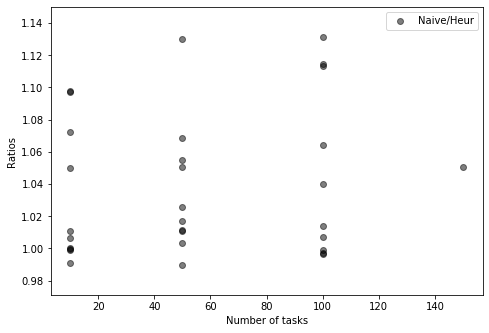

In [6]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
 

# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive/Heur', color='k', alpha = 0.5)
# plt.scatter(x, ratios2, label='Heur/Optimal', color='r', alpha = 0.5)
# plt.scatter(x, ratios3, label='Naive/Optimal', color='b', alpha = 0.5)
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.legend()
plt.show()